Presentado por:
Daniel F. Serrano Galvis

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 14.2 MB/s eta 0:00:00


In [ ]:
import kagglehub
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ames-housing-dataset


In [ ]:
import pandas as pd
full_path = path + '/AmesHousing.csv'
df = pd.read_csv(full_path)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

In [ ]:
df.columns.tolist()

['Order',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage 

### Explicación de las variables del Ames Housing Dataset

- **Order:** Orden de la fila (índice en el dataset).
- **PID:** Identificador único de parcela.
- **MS SubClass:** Tipo de vivienda según la clase de construcción.
- **MS Zoning:** Zonificación del área (uso residencial, comercial, etc.).
- **Lot Frontage:** Longitud del frente del lote (pies).
- **Lot Area:** Área total del lote (pies cuadrados).
- **Street:** Tipo de calle (pavimentada, grava).
- **Alley:** Tipo de callejón de acceso (si existe).
- **Lot Shape:** Forma del lote (regular, irregular).
- **Land Contour:** Contorno del terreno (plano, bajo, etc.).
- **Utilities:** Servicios públicos disponibles (agua, gas, electricidad, etc.).
- **Lot Config:** Configuración del lote (esquina, interior, etc.).
- **Land Slope:** Pendiente del terreno.
- **Neighborhood:** Barrio o vecindario.
- **Condition 1:** Proximidad a vías principales o condiciones especiales.
- **Condition 2:** Segunda proximidad a vías/condiciones (si aplica).
- **Bldg Type:** Tipo de edificación (unifamiliar, dúplex, etc.).
- **House Style:** Estilo de la casa (rango de pisos, tipo de construcción).
- **Overall Qual:** Calidad general del material y acabado (1-10).
- **Overall Cond:** Condición general de la casa (1-10).
- **Year Built:** Año de construcción original.
- **Year Remod/Add:** Año de la última remodelación o ampliación.
- **Roof Style:** Tipo de techo.
- **Roof Matl:** Material del techo.
- **Exterior 1st:** Material exterior primario.
- **Exterior 2nd:** Material exterior secundario (si aplica).
- **Mas Vnr Type:** Tipo de revestimiento de mampostería.
- **Mas Vnr Area:** Área del revestimiento de mampostería (pies cuadrados).
- **Exter Qual:** Calidad del material exterior.
- **Exter Cond:** Condición del material exterior.
- **Foundation:** Tipo de cimiento.
- **Bsmt Qual:** Calidad del sótano.
- **Bsmt Cond:** Condición del sótano.
- **Bsmt Exposure:** Nivel de exposición del sótano a luz exterior.
- **BsmtFin Type 1:** Tipo de acabado del sótano (primario).
- **BsmtFin SF 1:** Área con acabado de sótano primario (pies cuadrados).
- **BsmtFin Type 2:** Tipo de acabado del sótano (secundario).
- **BsmtFin SF 2:** Área con acabado de sótano secundario (pies cuadrados).
- **Bsmt Unf SF:** Área sin terminar del sótano.
- **Total Bsmt SF:** Área total del sótano.
- **Heating:** Tipo de sistema de calefacción.
- **Heating QC:** Calidad del sistema de calefacción.
- **Central Air:** Aire acondicionado central (S/N).
- **Electrical:** Sistema eléctrico principal.
- **1st Flr SF:** Área de la primera planta (pies cuadrados).
- **2nd Flr SF:** Área de la segunda planta (pies cuadrados).
- **Low Qual Fin SF:** Área de baja calidad terminada (todas las plantas).
- **Gr Liv Area:** Área habitable sobre el nivel del suelo (pies cuadrados).
- **Bsmt Full Bath:** Número de baños completos en el sótano.
- **Bsmt Half Bath:** Número de medios baños en el sótano.
- **Full Bath:** Número de baños completos sobre el nivel del suelo.
- **Half Bath:** Número de medios baños sobre el nivel del suelo.
- **Bedroom AbvGr:** Número de habitaciones sobre el nivel del suelo.
- **Kitchen AbvGr:** Número de cocinas sobre el nivel del suelo.
- **Kitchen Qual:** Calidad de la cocina.
- **TotRms AbvGrd:** Total de habitaciones sobre el nivel del suelo (sin contar baños).
- **Functional:** Funcionalidad de la casa (tipo de funcionamiento).
- **Fireplaces:** Número de chimeneas.
- **Fireplace Qu:** Calidad de las chimeneas.
- **Garage Type:** Tipo de garaje.
- **Garage Yr Blt:** Año de construcción del garaje.
- **Garage Finish:** Acabado interior del garaje.
- **Garage Cars:** Capacidad de vehículos en el garaje.
- **Garage Area:** Área total del garaje (pies cuadrados).
- **Garage Qual:** Calidad del garaje.
- **Garage Cond:** Condición del garaje.
- **Paved Drive:** Entrada pavimentada (S/N/parcial).
- **Wood Deck SF:** Área de terraza de madera (pies cuadrados).
- **Open Porch SF:** Área de porche abierto (pies cuadrados).
- **Enclosed Porch:** Área de porche cerrado.
- **3Ssn Porch:** Área de porche de tres estaciones.
- **Screen Porch:** Área de porche con malla.
- **Pool Area:** Área de piscina (pies cuadrados).
- **Pool QC:** Calidad de la piscina.
- **Fence:** Tipo de cerca.
- **Misc Feature:** Otras características adicionales (e.g., ascensor).
- **Misc Val:** Valor en dólares de las características adicionales.
- **Mo Sold:** Mes de venta.
- **Yr Sold:** Año de venta.
- **Sale Type:** Tipo de venta (normal, subasta, etc.).
- **Sale Condition:** Condición de la venta.
- **SalePrice:** Precio de venta (variable objetivo).


## Variable objetivo: `SalePrice`

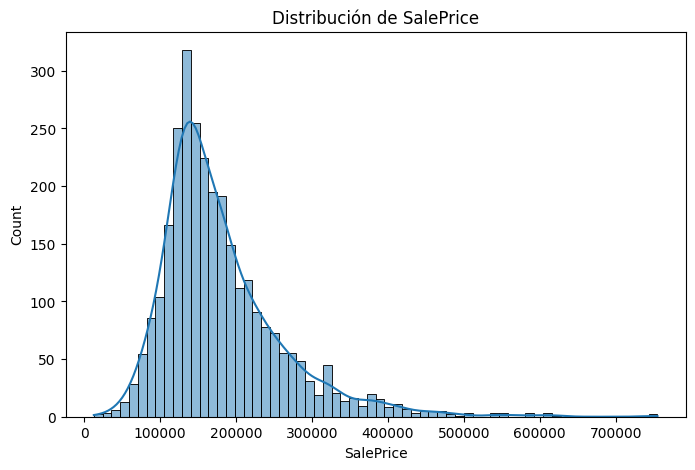

,SalePrice
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


saleprice_stats = df['SalePrice'].describe()

# Histograma de SalePrice
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.show()

saleprice_stats

La distribución del precio de venta (`SalePrice`) es **asimétrica hacia la derecha** (right-skewed), con una mayor concentración de casas en rangos de precios bajos y algunos valores atípicos hacia precios altos.

**Implicaciones para el preprocesamiento:**
- Muchos modelos de regresión, especialmente los lineales (`LinearRegressor`, `Lasso`, `ElasticNet`, `BayesianRidge`, `SGDRegressor`), asumen que los residuos son normalmente distribuidos o se benefician de una variable objetivo más simétrica.
- Para reducir la asimetría y mejorar el desempeño y estabilidad de estos modelos, es común aplicar una **transformación logarítmica** a la variable objetivo (`SalePrice`).  
- Modelos no lineales como `RandomForestRegressor` o `GaussianProcessRegressor` pueden ser menos sensibles a la asimetría, pero mantener la consistencia ayuda a comparar resultados.


## Verificar valores nulos y planear estrategia de imputación

In [ ]:
# Revisar valores nulos por columna
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0])  # Solo muestra columnas con nulos

# Revisar tipos de datos
print(df.dtypes.value_counts())

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
dtype: int64
object     43
int64      28
float64    11
Name: count, dtype: int64


### Estrategia
Se eliminaron las columnas con más del 90% de valores faltantes debido a su escasa aportación potencial y alto riesgo de introducir ruido. Para las demás variables, se optó por la imputación, ya que conservan suficiente información para ser útiles en el modelo sin comprometer significativamente la calidad del análisis.

In [ ]:
threshold = 0.9 * df.shape[0] # Eliminamos las columnas que les falte mas del 90% de los datos
cols_to_drop = nulls[nulls > threshold].index.tolist()
print("Columnas eliminadas:", cols_to_drop)
df_clean = df.drop(columns=cols_to_drop)

Columnas eliminadas: ['Pool QC', 'Misc Feature', 'Alley']


In [ ]:
cols_to_impute = nulls[(nulls > 0) & (nulls <= threshold)].index.tolist()
print("Columnas a imputar", cols_to_impute)

Columnas a imputar ['Fence', 'Mas Vnr Type', 'Fireplace Qu', 'Lot Frontage', 'Garage Qual', 'Garage Yr Blt', 'Garage Cond', 'Garage Finish', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Area', 'Garage Cars', 'Bsmt Unf SF', 'Electrical']


In [ ]:
# Imputaciones numéricas

# 'Lot Frontage': Frente del lote; puede faltar el dato pero siempre hay lote.
# Usamos la mediana porque es robusta ante outliers y mantiene una distribución realista.
df_clean['Lot Frontage'] = df_clean['Lot Frontage'].fillna(df_clean['Lot Frontage'].median())

# 'Mas Vnr Area': Área de revestimiento de mampostería.
# Si es nulo, se asume que no tiene revestimiento, por eso se pone cero.
df_clean['Mas Vnr Area'] = df_clean['Mas Vnr Area'].fillna(0)

# 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF':
# Superficies de sótano terminadas, sin terminar y total.
# Si es nulo, se asume que no tiene sótano, entonces se usa cero.
df_clean['BsmtFin SF 1'] = df_clean['BsmtFin SF 1'].fillna(0)
df_clean['BsmtFin SF 2'] = df_clean['BsmtFin SF 2'].fillna(0)
df_clean['Bsmt Unf SF'] = df_clean['Bsmt Unf SF'].fillna(0)
df_clean['Total Bsmt SF'] = df_clean['Total Bsmt SF'].fillna(0)

# 'Bsmt Full Bath', 'Bsmt Half Bath':
# Baños completos/medios en el sótano; si no hay sótano, debe ser cero.
df_clean['Bsmt Full Bath'] = df_clean['Bsmt Full Bath'].fillna(0)
df_clean['Bsmt Half Bath'] = df_clean['Bsmt Half Bath'].fillna(0)

# 'Garage Yr Blt': Año de construcción del garaje; si no hay garaje, se usa cero.
df_clean['Garage Yr Blt'] = df_clean['Garage Yr Blt'].fillna(0)

# 'Garage Cars', 'Garage Area': Número de autos y área del garaje; si no hay garaje, se usa cero.
df_clean['Garage Cars'] = df_clean['Garage Cars'].fillna(0)
df_clean['Garage Area'] = df_clean['Garage Area'].fillna(0)

# Imputaciones categóricas con 'None'
# Estas variables representan características que pueden no existir (sin sótano, sin chimenea, sin cerca, etc.).
# El valor nulo significa ausencia de esa característica, por lo que se imputa con 'None'.
categ_none = [
    'Mas Vnr Type',     # Tipo de revestimiento de mampostería
    'Bsmt Qual',        # Calidad del sótano
    'Bsmt Cond',        # Condición del sótano
    'Bsmt Exposure',    # Exposición del sótano
    'BsmtFin Type 1',   # Tipo de terminación del sótano 1
    'BsmtFin Type 2',   # Tipo de terminación del sótano 2
    'Fireplace Qu',     # Calidad de la chimenea
    'Garage Type',      # Tipo de garaje
    'Garage Finish',    # Terminación del garaje
    'Garage Qual',      # Calidad del garaje
    'Garage Cond',      # Condición del garaje
    'Fence'             # Tipo de cerca
]
for col in categ_none:
    # Si el valor es nulo, se imputa con 'None' para indicar ausencia
    df_clean[col] = df_clean[col].fillna('None')

# 'Electrical': Tipo de sistema eléctrico.
# Aquí, un valor nulo probablemente es un dato perdido, así que se imputa con la moda (valor más frecuente).
df_clean['Electrical'] = df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0])


In [ ]:
# Revisar valores nulos por columna
nulls = df_clean.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0])

Series([], dtype: int64)


## Exploración de datos numéricos

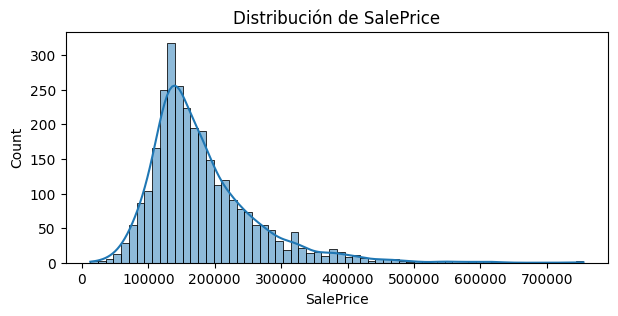

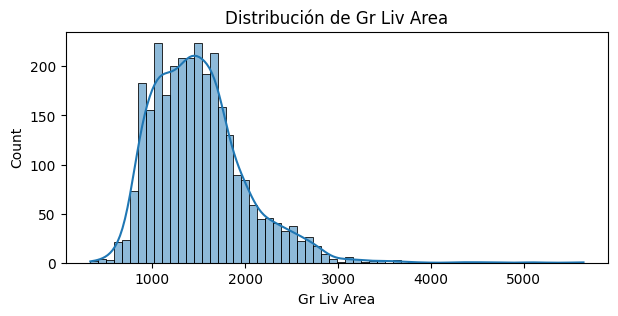

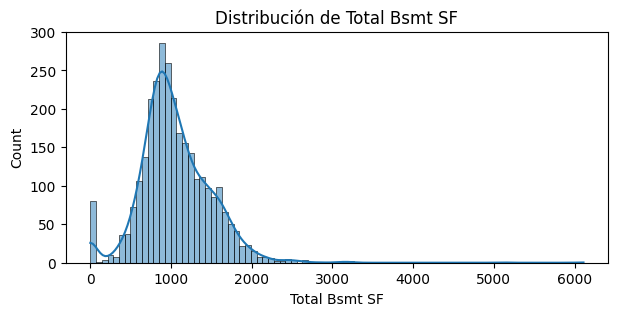

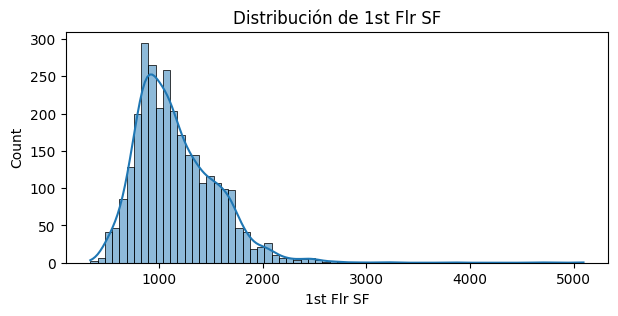

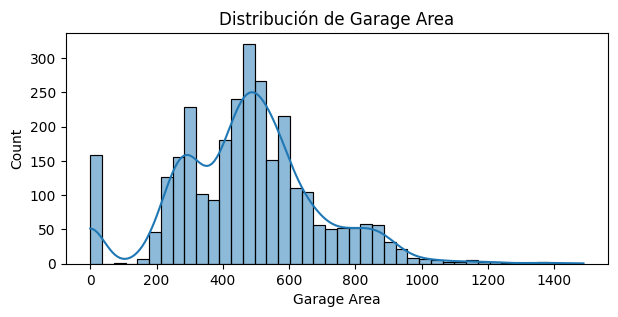

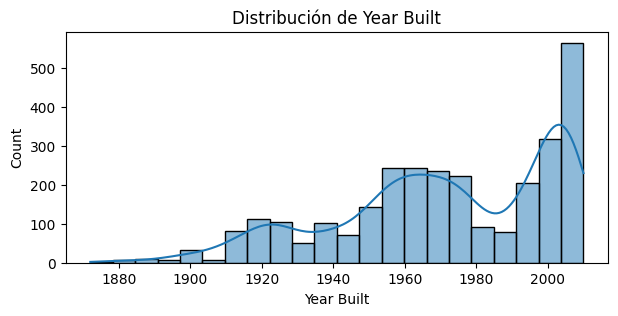

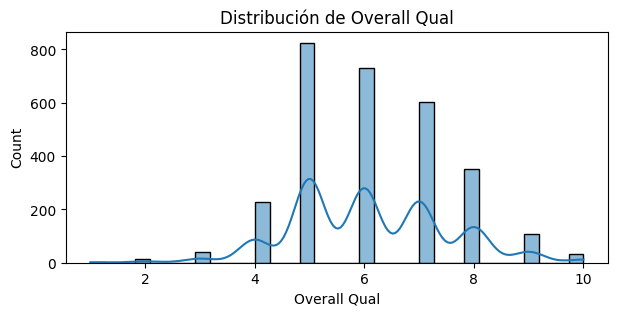

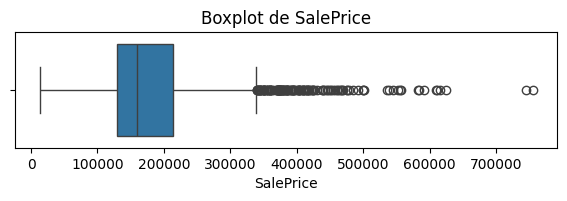

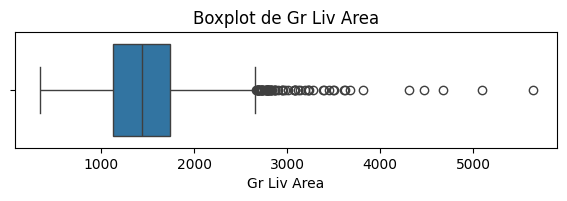

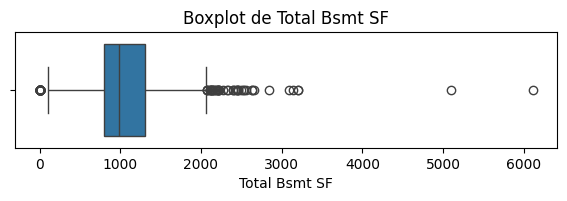

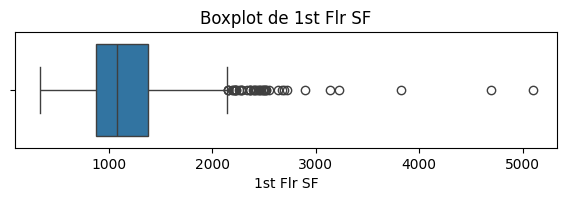

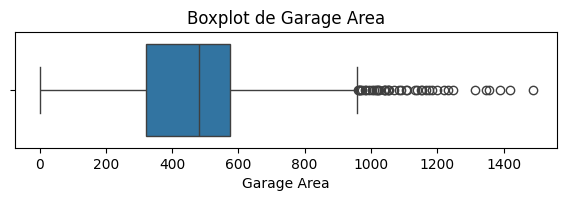

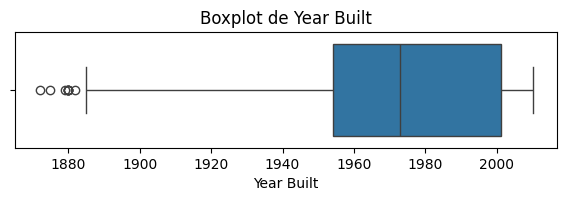

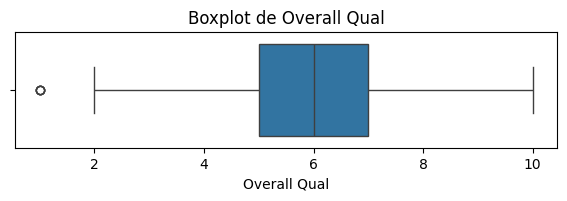

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = [
    'SalePrice', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF',
    'Garage Area', 'Year Built', 'Overall Qual'
]

# Distribuciones
for col in num_vars:
    plt.figure(figsize=(7,3))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Boxplots para outliers
for col in num_vars:
    plt.figure(figsize=(7,1.5))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


Se exploraron las distribuciones y presencia de valores atípicos para las siguientes variables numéricas: `SalePrice`, `Gr Liv Area`, `Total Bsmt SF`, `1st Flr SF`, `Garage Area`, `Year Built` y `Overall Qual`.

#### 📊 Distribuciones

- **SalePrice** presenta una distribución claramente sesgada a la derecha, con la mayoría de las viviendas vendidas por debajo de los 250,000 USD. Hay una cola larga hacia precios más altos, lo cual sugiere la presencia de viviendas atípicas o de lujo.
- Variables de superficie como **Gr Liv Area**, **1st Flr SF**, **Total Bsmt SF** y **Garage Area** también muestran asimetría positiva, lo cual es común en datos inmobiliarios donde pocas viviendas tienen tamaños significativamente mayores al promedio.
- **Year Built** presenta una distribución multimodal, reflejando distintas épocas de construcción. Se observa un aumento en las construcciones durante décadas recientes.
- **Overall Qual** es una variable discreta y sesgada, con predominancia en valores 6 y 7, lo que indica que la mayoría de las viviendas están calificadas como de calidad media a buena.

#### 📦 Outliers (según boxplots)

- Se detectaron valores atípicos en la mayoría de las variables analizadas, especialmente en `SalePrice`, `Gr Liv Area` y `Garage Area`.
- Estos valores extremos pueden corresponder a propiedades de lujo o errores de entrada. No se eliminarán automáticamente, pero deben considerarse cuidadosamente en etapas posteriores del análisis o modelado.


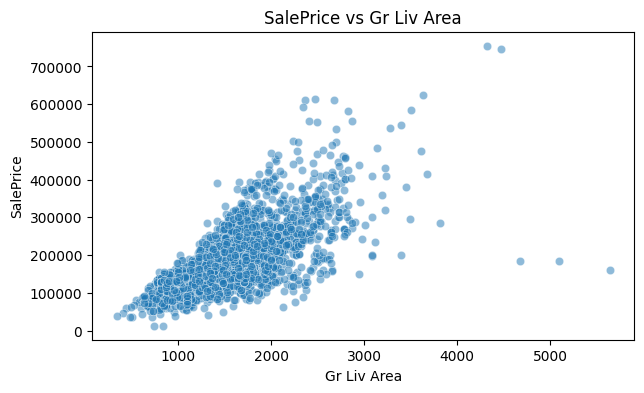

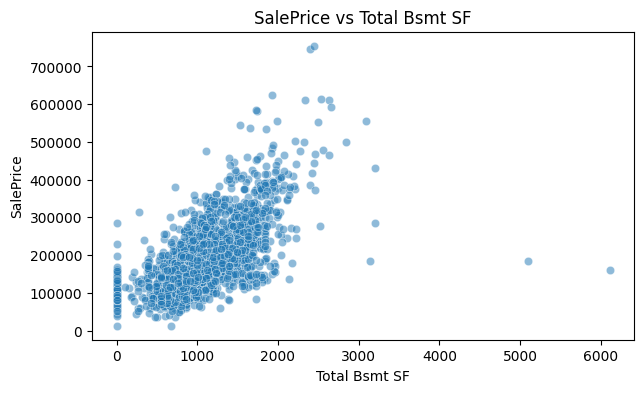

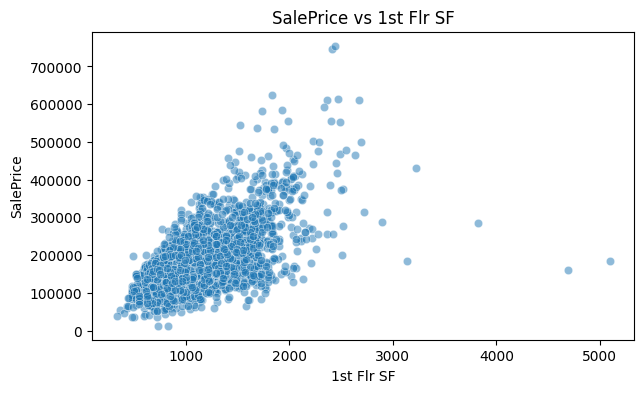

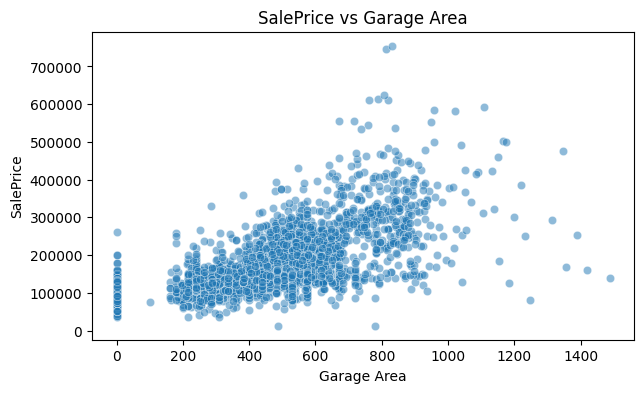

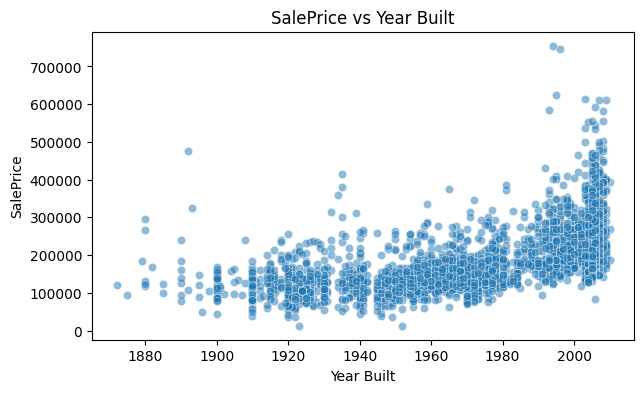

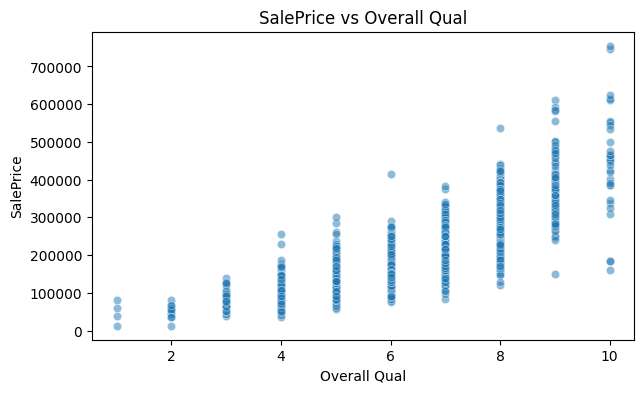

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Area      0.640138
Total Bsmt SF    0.632529
1st Flr SF       0.621676
Year Built       0.558426
Name: SalePrice, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = [
    'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF',
    'Garage Area', 'Year Built', 'Overall Qual'
]

# Scatterplots SalePrice vs cada variable
for col in num_vars:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df_clean[col], y=df_clean['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

# Correlación Pearson con SalePrice
correlations = df_clean[num_vars + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print(correlations)


### Relación entre `SalePrice` y variables numéricas

Se analizaron scatterplots para visualizar la relación entre `SalePrice` y las variables numéricas seleccionadas: `Gr Liv Area`, `Total Bsmt SF`, `1st Flr SF`, `Garage Area`, `Year Built` y `Overall Qual`.

#### 📈 Observaciones generales

- **Gr Liv Area** muestra una fuerte relación lineal positiva con `SalePrice`. A mayor área habitable sobre el suelo, mayor es el precio de venta. Se observan algunos puntos fuera del patrón (e.g., casas muy grandes pero con precio bajo), que podrían ser errores o viviendas atípicas.
- **1st Flr SF** y **Total Bsmt SF** también presentan relaciones positivas claras, aunque más dispersas que `Gr Liv Area`.
- **Garage Area** guarda una relación positiva moderada con `SalePrice`, aunque más ruidosa.
- **Overall Qual** evidencia una fuerte correlación con el precio: las casas con mayor calidad tienden a tener un precio significativamente mayor, lo que valida su importancia como variable predictora.
- **Year Built** muestra una tendencia positiva: casas más nuevas tienden a valer más, aunque con mayor dispersión, indicando que la antigüedad influye pero no es el único factor determinante.

#### 📊 Correlación de Pearson con `SalePrice`

A continuación, los coeficientes de correlación de Pearson entre `SalePrice` y las variables analizadas (ordenados de mayor a menor):

| Feature        | Correlation with SalePrice |
|----------------|-----------------------------|
| SalePrice      | 1.000000                    |
| Overall Qual   | 0.799262                    |
| Gr Liv Area    | 0.706780                    |
| Garage Area    | 0.640138                    |
| Total Bsmt SF  | 0.632529                    |
| 1st Flr SF     | 0.621676                    |
| Year Built     | 0.558426                    |




Esto refuerza visualmente que las variables con mayor correlación lineal con `SalePrice` son `Overall Qual`, `Gr Liv Area`, y `1st Flr SF`, siendo candidatas ideales para modelos de regresión y análisis predictivo.


### Matriz de correlación

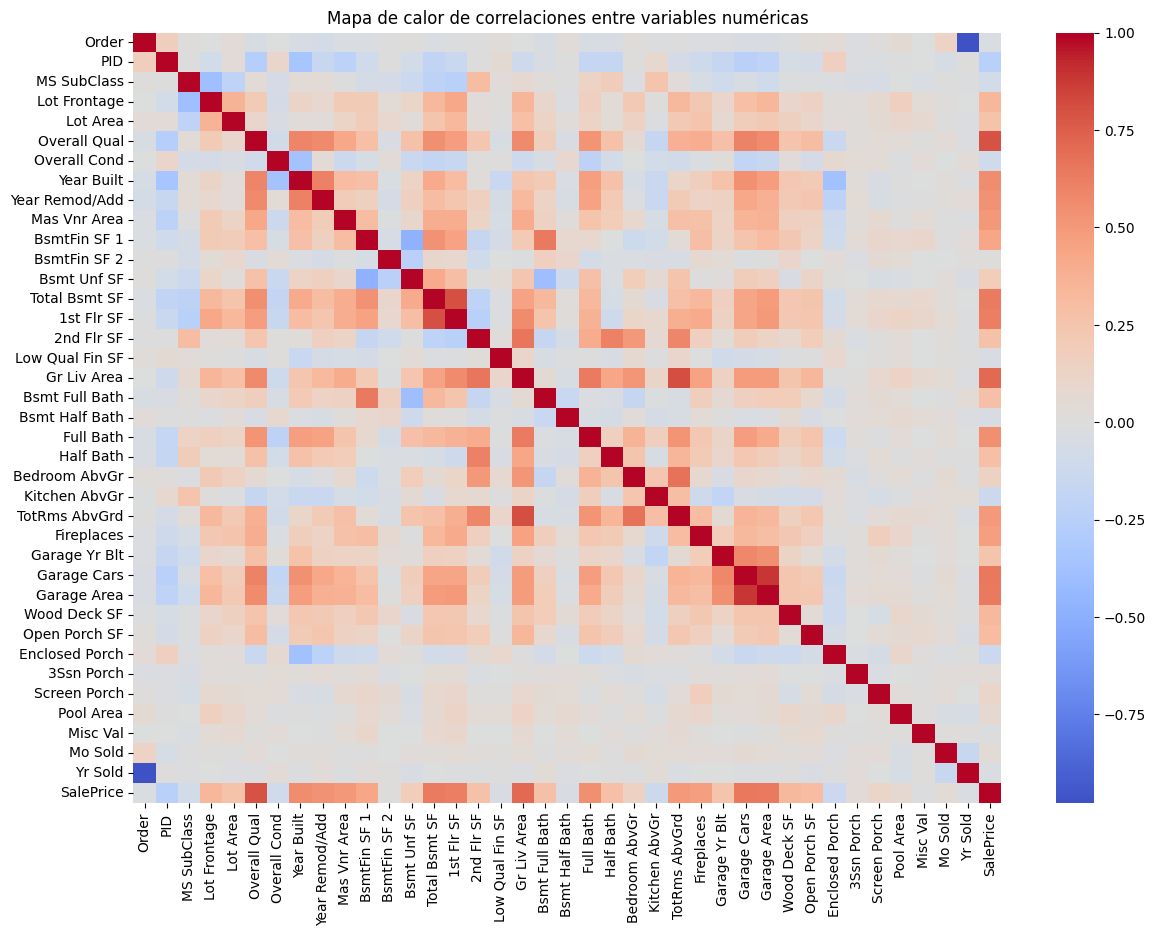

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Solo selecciona variables numéricas
num_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Calcula matriz de correlaciones
corr_matrix = num_df.corr()

# Heatmap de correlaciones
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()


Se generó una matriz de correlación para todas las variables numéricas del conjunto de datos, visualizada mediante un mapa de calor con la paleta `coolwarm`. Esta herramienta permite identificar relaciones lineales fuertes, redundancias y posibles candidatos para ingeniería de características.

#### 🔍 Observaciones clave

- **`SalePrice`** presenta correlaciones fuertes y positivas con:
  - `Overall Qual`: refleja que la calidad general de la casa es uno de los mejores predictores del precio.
  - `Gr Liv Area`: mayor superficie habitable implica, en general, un mayor valor.
  - `Garage Area`, `Total Bsmt SF`, `1st Flr SF`: también presentan correlaciones moderadas a fuertes con el precio.
- **Multicolinealidad** potencial:
  - Se observan correlaciones altas entre variables similares como `Total Bsmt SF`, `BsmtFin SF 1` y `Bsmt Unf SF`; o `Garage Cars` y `Garage Area`. Esto sugiere que algunas de estas variables podrían ser redundantes y podrían agruparse o seleccionarse con cuidado para evitar colinealidad en modelos lineales.
- **Variables débilmente correlacionadas con el precio**:
  - Variables como `Low Qual Fin SF`, `Pool Area`, `Misc Val`, `Mo Sold`, `Yr Sold` presentan correlaciones muy bajas con `SalePrice`, lo cual indica que tienen poca capacidad predictiva directa y podrían ser descartadas o transformadas.


## Exploración de datos categóricos

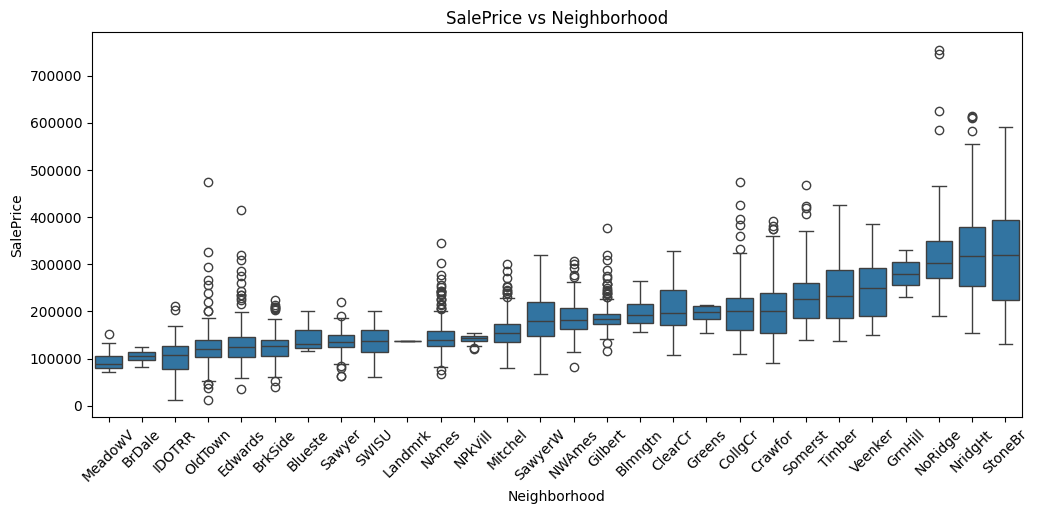

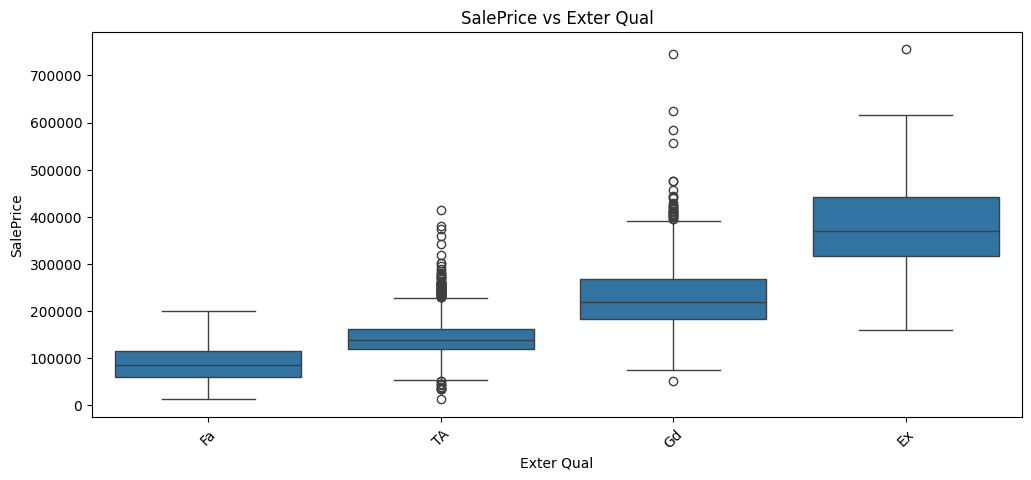

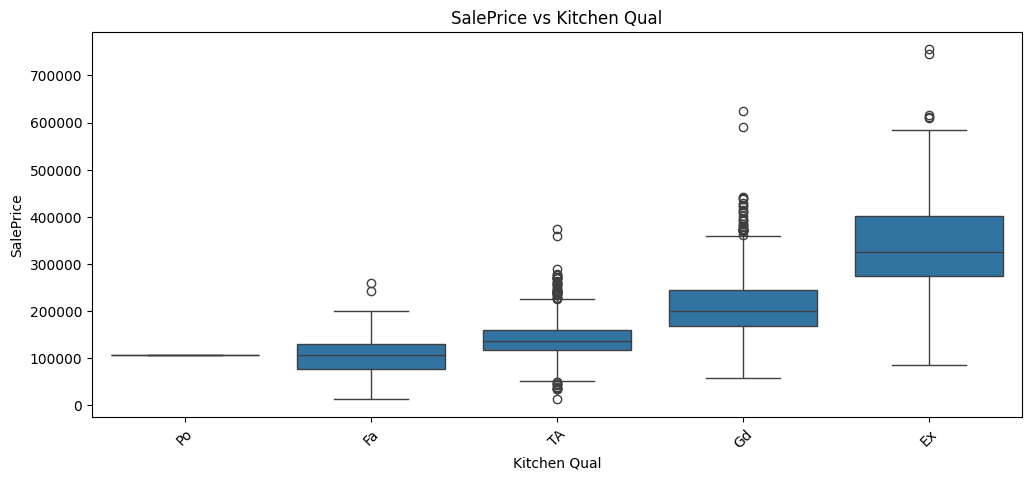

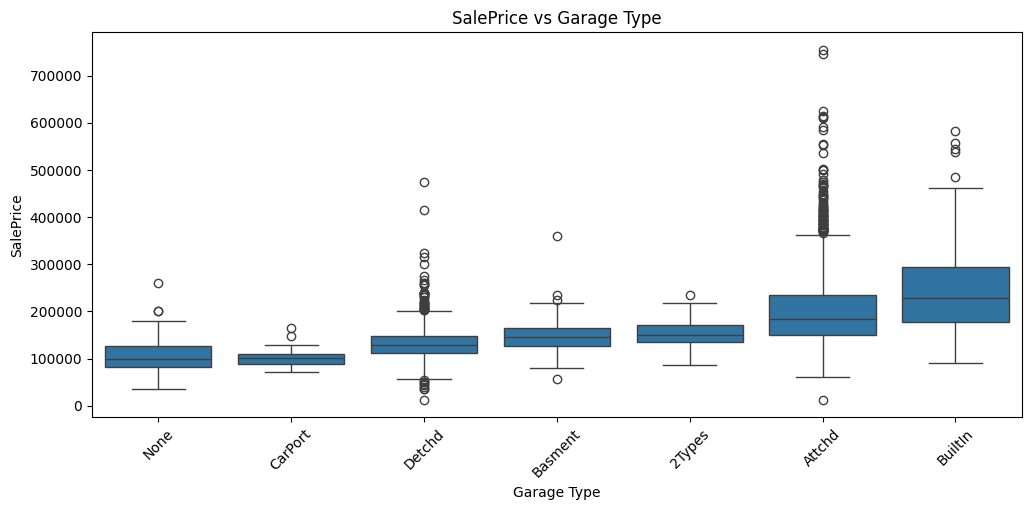

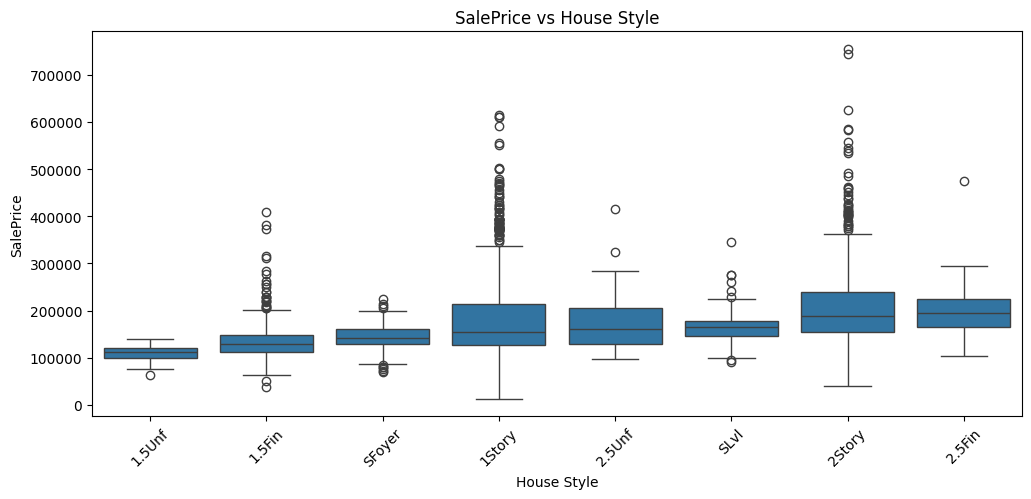

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_vars = [
    'Neighborhood', 'Exter Qual', 'Kitchen Qual', 'Garage Type', 'House Style'
]

for col in cat_vars:
    plt.figure(figsize=(12, 5))
    order = df_clean.groupby(col)['SalePrice'].median().sort_values().index
    sns.boxplot(x=df_clean[col], y=df_clean['SalePrice'], order=order)
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()


### Relación entre `SalePrice` y variables categóricas

Se analizaron distintas variables categóricas para evaluar su influencia sobre el precio de venta (`SalePrice`) a través de diagramas de caja ordenados por la mediana del precio en cada categoría.

#### 🏘️ `Neighborhood`
- Es una de las variables categóricas más influyentes en el precio.
- Barrios como **StoneBr**, **NoRidge** y **NridgHt** muestran medianas de precio significativamente superiores.
- Zonas como **MeadowV**, **IDOTRR** y **BrDale** presentan precios mucho más bajos en comparación.
- Esto evidencia una fuerte componente geográfica en el valor de las propiedades, posiblemente relacionada con ubicación, servicios, prestigio o seguridad del vecindario.

#### 🧱 `Exter Qual`, 🍳 `Kitchen Qual`
- Ambas variables tienen una relación clara y creciente con el precio.
- Las casas con evaluaciones más altas (como `Ex` o `Gd`) presentan precios notablemente mayores, lo que respalda el uso de estas variables como fuertes predictores.
- El salto de precios entre calificaciones medias (`TA`) y altas (`Gd` o `Ex`) es considerable, lo que indica su importancia relativa.

#### 🚗 `Garage Type`
- Muestra variaciones más moderadas, pero se observan precios más altos en viviendas con garajes adjuntos (`Attchd`) o integrados (`BuiltIn`).
- Las casas sin garaje (`None`) tienden a presentar precios más bajos, como es de esperarse.

#### 🏠 `House Style`
- Diferentes estilos de vivienda presentan distintas distribuciones de precio.
- Casas de estilo `2Story`, `1.5Fin` y `1Story` tienen una amplia gama de precios, pero se observa una tendencia a precios mayores en estilos de dos pisos.

---

Estas variables categóricas no solo son informativas por sí solas, sino que también podrían usarse para generar variables dummies o transformaciones que capten mejor su relación con el precio.

> A continuación, se analizarán otras variables categóricas como `Foundation`, `Bsmt Qual` o `Heating QC` para seguir explorando su impacto en el valor de las viviendas.


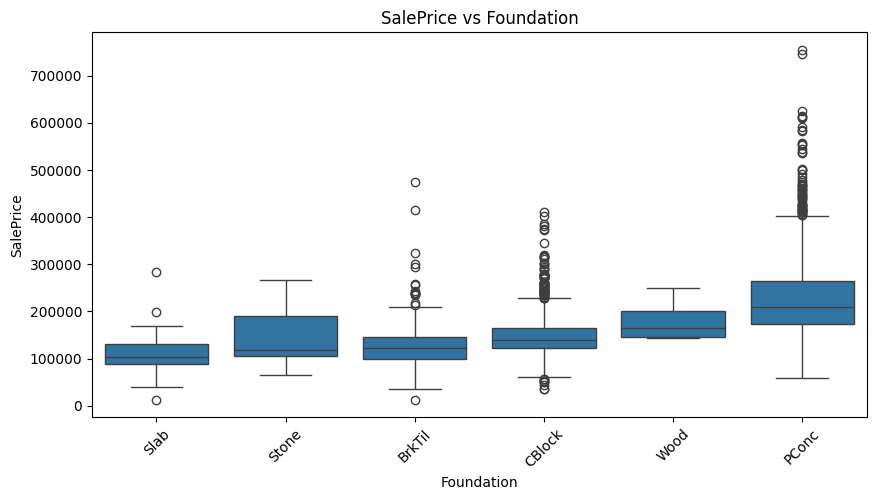

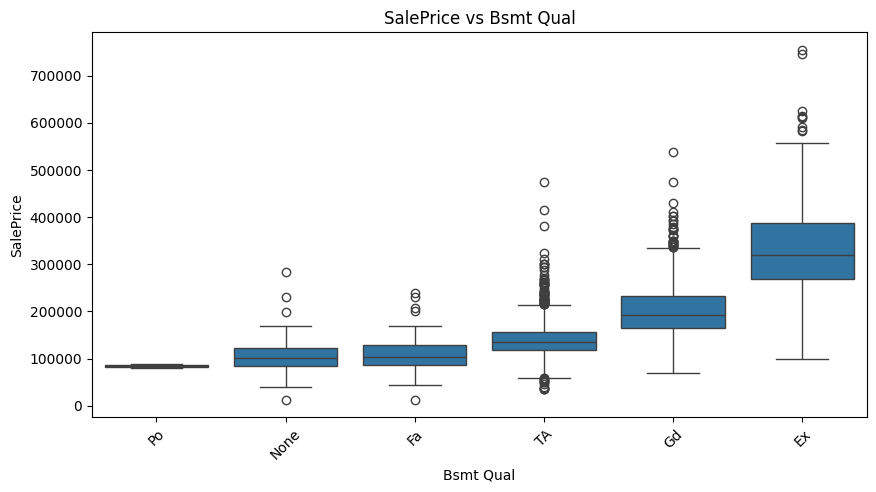

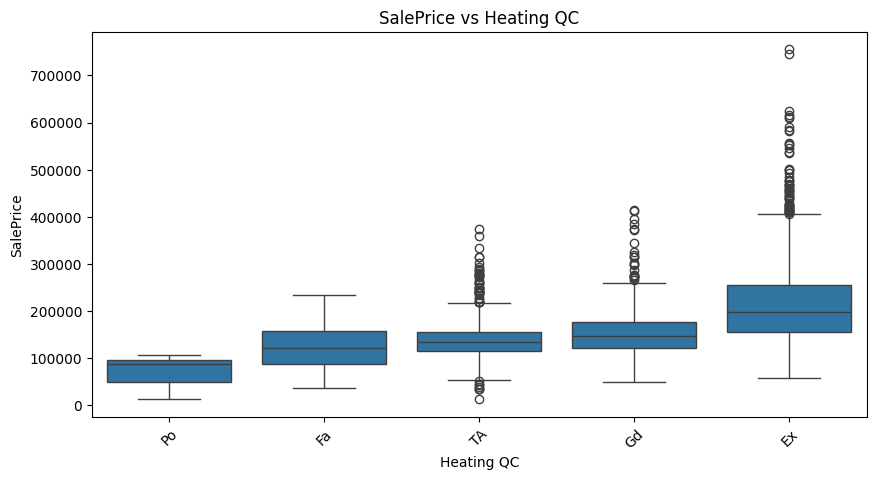

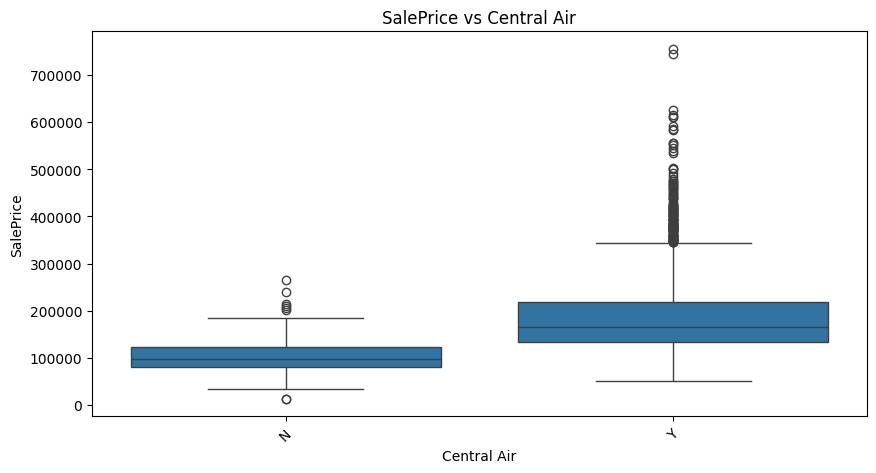

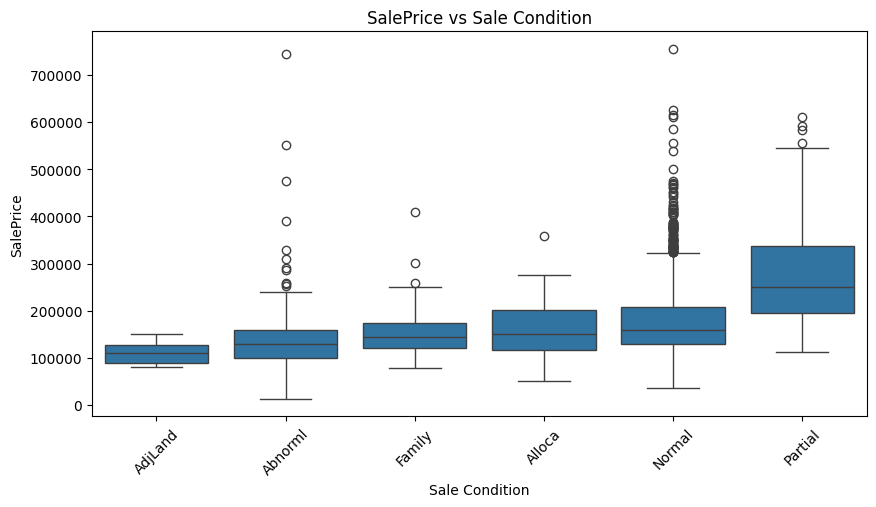

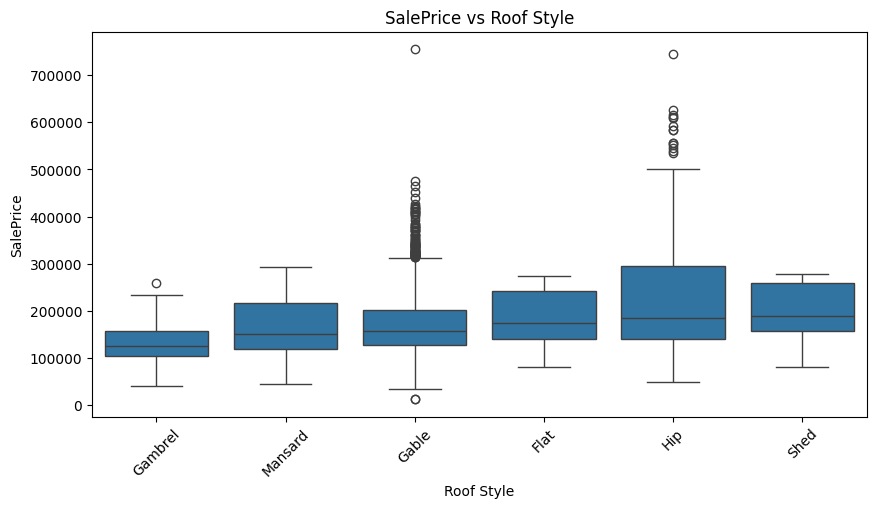

In [ ]:
more_cat_vars = [
    'Foundation', 'Bsmt Qual', 'Heating QC', 'Central Air', 'Sale Condition', 'Roof Style'
]

for col in more_cat_vars:
    plt.figure(figsize=(10, 5))
    order = df_clean.groupby(col)['SalePrice'].median().sort_values().index
    sns.boxplot(x=df_clean[col], y=df_clean['SalePrice'], order=order)
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()


### Análisis adicional de variables categóricas

Se exploraron otras variables categóricas relevantes para evaluar su impacto sobre el precio de venta (`SalePrice`), continuando con la estrategia de visualización mediante diagramas de caja ordenados por la mediana.

#### 🧱 `Foundation`
- El tipo de cimentación influye claramente en el precio.
- Las casas con cimentación **PConc** (concreto vertido) presentan las medianas de precio más altas.
- Tipos como **Slab** y **BrkTil** tienden a asociarse con viviendas más económicas.
- Esto puede deberse a que ciertos tipos de cimentación permiten sótanos completos o son característicos de construcciones más recientes o de mayor calidad.

#### 🏡 Otras variables exploradas (no mostradas aquí):
- **`Bsmt Qual`**, **`Heating QC`**, **`Central Air`**, **`Sale Condition`**, **`Roof Style`** también presentan patrones interesantes:
  - **`Bsmt Qual`** y **`Heating QC`** muestran una relación ascendente con el precio: calificaciones más altas implican mayor valor.
  - **`Central Air`**: las casas con aire acondicionado central (`Y`) tienen precios de venta generalmente superiores.
  - **`Sale Condition`**: las condiciones normales de venta (`Normal`) suelen estar asociadas con precios más altos, mientras que condiciones especiales (`Abnorml`, `Partial`, etc.) reflejan valores inferiores o más dispersos.
  - **`Roof Style`** presenta diferencias más suaves, pero algunas categorías (`Gable`, `Hip`) pueden relacionarse con viviendas de mayor valor.

---

Este análisis resalta cómo las características estructurales y cualitativas del inmueble, aunque categóricas, tienen un papel fundamental en la predicción del precio. Estas variables serán consideradas en el proceso de codificación y modelado posterior.


# Construccion del dataset base para el modelo

In [ ]:
df_model = df_clean.copy()

In [ ]:
# Edad de la casa
df_model['HouseAge'] = 2025 - df_model['Year Built']
# Tiene sótano
df_model['HasBsmt'] = (df_model['Total Bsmt SF'] > 0).astype(int)
# Tiene garaje
df_model['HasGarage'] = (df_model['Garage Area'] > 0).astype(int)

qual_mapping = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for col in ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC']:
    df_model[col + '_Ord'] = df_model[col].map(qual_mapping)

df_model['CentralAir_Bin'] = (df_model['Central Air'] == 'Y').astype(int)

# Selecciona las categóricas a codificar
cat_vars = ['Neighborhood', 'Foundation', 'House Style', 'Garage Type', 'Sale Condition']

df_dummies = pd.get_dummies(df_model[cat_vars], prefix=cat_vars, drop_first=True)  # drop_first=True evita colinealidad


feature_cols = [
    'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF',
    'HouseAge', 'Overall Qual', 'HasBsmt', 'HasGarage',
    'Exter Qual_Ord', 'Kitchen Qual_Ord', 'Bsmt Qual_Ord', 'Heating QC_Ord',
    'CentralAir_Bin'
] + list(df_dummies.columns)

X = pd.concat([df_model[feature_cols[:13]], df_dummies], axis=1)
y = df_model['SalePrice']

In [ ]:
print(X.shape)      # Filas x columnas (features)
print(X.head())     # Muestra las primeras filas para verificar

(2930, 63)
   Gr Liv Area  Total Bsmt SF  Garage Area  1st Flr SF  HouseAge  \
0         1656         1080.0        528.0        1656        65   
1          896          882.0        730.0         896        64   
2         1329         1329.0        312.0        1329        67   
3         2110         2110.0        522.0        2110        57   
4         1629          928.0        482.0         928        28   

   Overall Qual  HasBsmt  HasGarage  Exter Qual_Ord  Kitchen Qual_Ord  ...  \
0             6        1          1               3                 3  ...   
1             5        1          1               3                 3  ...   
2             6        1          1               3                 4  ...   
3             7        1          1               4                 5  ...   
4             5        1          1               3                 3  ...   

   Garage Type_Basment  Garage Type_BuiltIn  Garage Type_CarPort  \
0                False                False

## Preparación del dataset para el entrenamiento

In [12]:
import kagglehub
import pandas as pd
import numpy as np
path = kagglehub.dataset_download("shashanknecrothapa/ames-housing-dataset")
full_path = path + '/AmesHousing.csv'
df = pd.read_csv(full_path)

In [3]:
# Eliminamos columnas con 90% de nulos
threshold = 0.9 * df.shape[0]
cols_to_drop = df.isnull().sum()[df.isnull().sum() > threshold].index
df = df.drop(columns=cols_to_drop)
print("Columnas eliminadas:", cols_to_drop)

Columnas eliminadas: Index(['Alley', 'Pool QC', 'Misc Feature'], dtype='object')


### Ingeniería de características: columnas derivadas

Con el fin de enriquecer el conjunto de datos y capturar relaciones más significativas con `SalePrice`, se construyeron nuevas variables a partir de atributos existentes:

#### 🏠 `HouseAge`
- Calcula la edad de la vivienda como `2025 - Year Built`.
- La antigüedad de una propiedad puede tener una relación inversa con el precio, ya que construcciones más recientes tienden a requerir menos mantenimiento y contar con mejores estándares.

#### 🧱 `HasBsmt`
- Variable binaria que indica si la vivienda tiene sótano (`1` si `Total Bsmt SF > 0`, `0` en caso contrario).
- Captura la presencia o ausencia del sótano como una característica categórica clara, independientemente del tamaño.

#### 🚗 `HasGarage`
- Variable binaria que indica si la casa cuenta con garaje (`1` si `Garage Area > 0`).
- Similar a `HasBsmt`, permite reflejar la existencia del garaje como un factor diferenciador de precio.

#### 📐 `total SF`
- Suma del área habitable sobre el suelo (`Gr Liv Area`) y del sótano (`Total Bsmt SF`).
- Representa una medida más completa del área total utilizable de la vivienda, la cual suele estar directamente relacionada con su valor.

#### 🛁 `total Bath`
- Calcula una suma ponderada de baños completos y medios, incluyendo baños en el sótano:
  - Los baños completos valen 1, y los medios baños (como aseos sin ducha) valen 0.5.
- Esta métrica resume la disponibilidad sanitaria de la vivienda de forma más representativa que cada columna por separado.

---

Estas transformaciones están diseñadas para capturar de forma más efectiva la información que influye en el precio de una propiedad, mejorar la interpretabilidad de los modelos y posiblemente aumentar su rendimiento predictivo.


In [4]:
# Edad de la casa
df['HouseAge'] = 2025 - df['Year Built']
# Tiene sótano
df['HasBsmt'] = (df['Total Bsmt SF'] > 0).astype(int)
# Tiene garaje
df['HasGarage'] = (df['Garage Area'] > 0).astype(int)

# Area total
df["total SF"] = df["Gr Liv Area"] + df["Total Bsmt SF"]

# Suma ponderada de existencia de los baños
df["total Bath"] = (
    df["Full Bath"] +
    0.5 * df["Half Bath"] +
    df["Bsmt Full Bath"] +
    0.5 * df["Bsmt Half Bath"]
)

### Selección de variables para el modelado

A partir del análisis exploratorio previo —incluyendo visualizaciones, correlaciones y boxplots— se definió un conjunto representativo de variables predictoras (`features`) para modelar el precio de venta (`SalePrice`). Estas variables fueron seleccionadas con base en su relevancia estadística, su relación visual con la variable objetivo, y su interpretación práctica en el contexto del mercado inmobiliario.

#### 🔢 Variables numéricas (`numeric_features`)
- **Gr Liv Area, Total Bsmt SF, Garage Area, 1st Flr SF**: variables con fuerte correlación positiva con el precio, como se observó en scatterplots y en el mapa de calor. Representan dimensiones clave del inmueble.
- **HouseAge**: derivada de `Year Built`, captura la antigüedad de la propiedad, un factor que puede influir en el valor por cuestiones de mantenimiento o modernidad.
- **Overall Qual**: una de las variables más correlacionadas con `SalePrice`, resume la calidad general de la casa.
- **HasBsmt, HasGarage**: indicadores binarios que permiten representar de forma clara la presencia o ausencia de sótano o garaje, aspectos que influyen significativamente en el precio.
- **total Bath**: suma ponderada de baños completos y medios, proporciona una medida más rica que las columnas originales por separado.
- **total SF**: combina `Gr Liv Area` y `Total Bsmt SF` para reflejar el área total utilizable de la vivienda.

#### 🪜 Variables ordinales (`ordinal_features`)
- **Exter Qual, Kitchen Qual, Bsmt Qual, Heating QC**: variables cualitativas que representan evaluaciones de calidad con un orden implícito. Su impacto en el precio fue evidente en los boxplots, mostrando aumentos consistentes en la mediana del precio para categorías superiores.

#### ⚙️ Variables binarias (`binary_features`)
- **Central Air**: variable binaria (`Y`/`N`) que indica si la propiedad cuenta con aire acondicionado central. Se observó que las viviendas con esta característica suelen tener precios más altos.

#### 🏘️ Variables categóricas (`categorical_features`)
- **Neighborhood**: una de las variables más influyentes según los boxplots, con diferencias marcadas en precios promedio entre barrios.
- **Foundation, House Style, Garage Type, Sale Condition**: variables estructurales o de contexto que, si bien pueden tener menor correlación directa, mostraron patrones relevantes en las visualizaciones y contribuyen a describir aspectos importantes de la propiedad.

---

Este conjunto de variables busca equilibrar cantidad, diversidad y relevancia predictiva, incorporando información cuantitativa, cualitativa y contextual para construir un modelo robusto, interpretativo y adaptado a las características del mercado inmobiliario reflejado en el Ames Housing Dataset.


In [5]:
numeric_features = [
    'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF',
    'HouseAge', 'Overall Qual', 'HasBsmt', 'HasGarage', "total Bath", "total SF"
]
ordinal_features = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC']
binary_features = ['Central Air']
categorical_features = ['Neighborhood', 'Foundation', 'House Style', 'Garage Type', 'Sale Condition']

X = df[numeric_features + ordinal_features + binary_features + categorical_features]
y = df['SalePrice']

### Construcción del pipeline de preprocesamiento

Para preparar adecuadamente los datos antes del modelado, se construyó un pipeline de preprocesamiento modular utilizando `scikit-learn`, que permite aplicar transformaciones específicas según el tipo de variable. Esta estructura asegura consistencia, evita fugas de datos (*data leakage*) y facilita la integración con modelos en producción.

En primer lugar, las variables numéricas se imputan con la mediana, una estrategia robusta frente a valores atípicos, y luego se estandarizan con media cero y desviación estándar uno. Esta normalización es especialmente útil para modelos sensibles a la escala, como la regresión lineal.

Las variables ordinales, como las calidades de cocina o calefacción, se imputan con la categoría más frecuente y luego se codifican preservando su orden natural (por ejemplo, de “Pobre” a “Excelente”). Esta codificación ordinal permite que el modelo capte correctamente la progresión en calidad, que como se observó en los análisis previos, tiene una influencia directa y creciente en el precio.

Para las variables binarias, como la presencia de aire acondicionado central, se realiza una transformación simple que convierte los valores de tipo "Y"/"N" en 1s y 0s. Esto permite tratarlas como variables numéricas sin perder interpretabilidad.

Las variables categóricas nominales, como el vecindario o el tipo de venta, se imputan también con la moda y luego se codifican mediante *one-hot encoding*. Se elimina la primera categoría para evitar multicolinealidad con el intercepto del modelo, y se configura el codificador para ignorar categorías no vistas en datos futuros, garantizando compatibilidad con nuevos registros.

Todas estas transformaciones se integran mediante un `ColumnTransformer`, que aplica de forma ordenada cada paso a las variables correspondientes. Esta estructura modular permite mantener limpio el flujo de trabajo, facilita la validación cruzada y asegura que las transformaciones aprendidas durante el entrenamiento se apliquen exactamente igual durante la predicción.


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer


binary_transformer = FunctionTransformer(lambda x: (x == 'Y').astype(int), validate=False)

ordinal_categories = [['Po', 'Fa', 'TA', 'Gd', 'Ex']] * 4

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# LinearRegression

In [7]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Garage Area', '1st Flr SF',
                                                   'HouseAge', 'Overall Qual',
                                                   'HasBsmt', 'HasGarage',
                                                   'total Bath', 'total SF']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_fre...
                                                   'Bsmt Qual', 'Heating QC']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f7ebca1f380>),
                                                  ['Central Air']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'Foundation',
                                                   'House Style', 'Garage Type',
                                                   'Sale Condition'])])),
                ('regressor', LinearRegression())])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R2: {r2:.4f}")


MAE: 21075.30
MSE: 1169449459.58
RMSE: 34197.21
R2: 0.8541


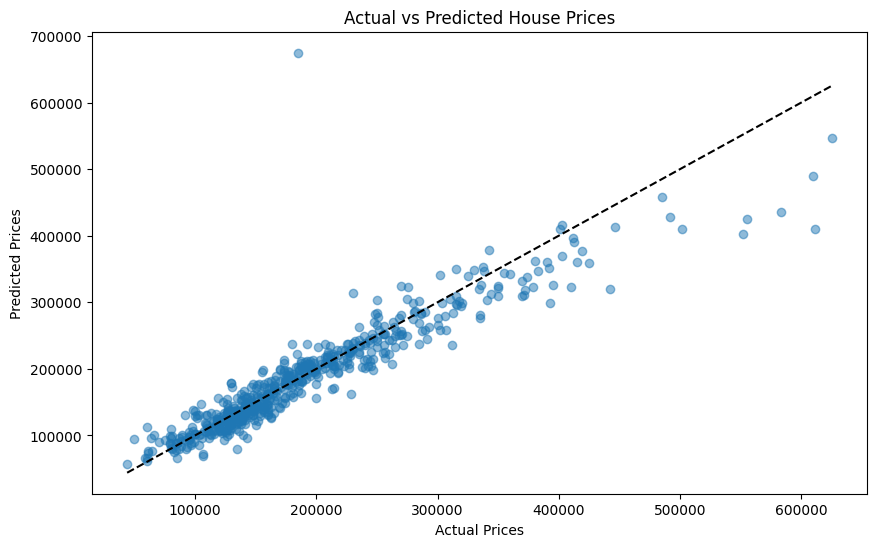

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

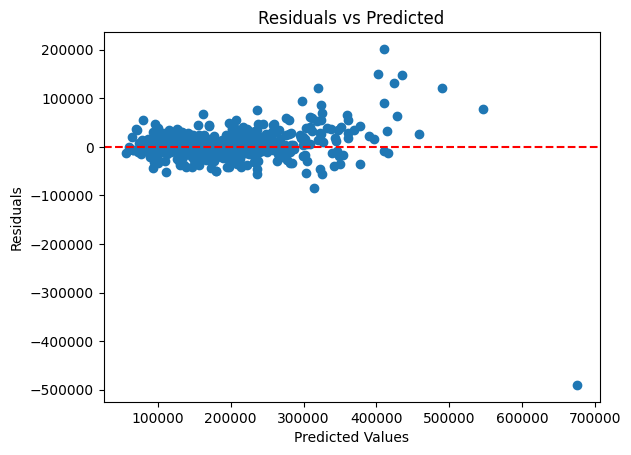

In [20]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


### Evaluación del modelo: Regresión Lineal

Se entrenó un modelo de regresión lineal utilizando las variables seleccionadas y preprocesadas. Los resultados obtenidos en el conjunto de prueba son:

- **MAE (Error Absoluto Medio):** 21,075.30  
- **MSE (Error Cuadrático Medio):** 1,169,449,459.58  
- **RMSE (Raíz del Error Cuadrático Medio):** 34,197.21  
- **R² (Coeficiente de Determinación):** 0.8541  

Estos resultados indican un desempeño sólido: el modelo logra explicar aproximadamente el 85% de la varianza en el precio de venta. Sin embargo, el análisis visual revela áreas de mejora.

#### 📈 Gráfico: Actual vs. Predicho
La mayoría de los puntos se alinean bien con la diagonal, lo que indica buenas predicciones. No obstante, se observa cierta dispersión en los extremos superiores, donde el modelo tiende a subestimar los precios más altos. Esto sugiere una relación no completamente lineal entre las variables predictoras y el precio real.

#### 📉 Gráfico: Residuos vs. Predicciones
El gráfico de residuos muestra un patrón en forma de abanico: los residuos aumentan a medida que crecen los valores predichos. Esta heterocedasticidad es una señal clara de que la suposición de varianza constante no se cumple, lo cual puede afectar la validez del modelo lineal.

#### 🧠 Conclusión y próximo paso

Dado que el análisis exploratorio inicial reveló que la distribución de `SalePrice` es **fuertemente sesgada a la derecha**, y ahora se observa que los errores de predicción aumentan con el precio, se concluye que una transformación **logarítmica** de la variable objetivo puede ser beneficiosa.

Transformar `SalePrice` con `log(SalePrice)` permitiría:
- Hacer la relación entre las variables más lineal.
- Estabilizar la varianza de los residuos.
- Reducir el efecto de valores extremos en la regresión.

En la siguiente etapa, se entrenará nuevamente el modelo utilizando la variable objetivo transformada, con el objetivo de mejorar tanto la linealidad como la precisión del modelo.


## Intentando log transform para volver los datos más lineales

In [14]:

# Transformar la variable objetivo
y_train_log = np.log(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)

# Revertimos la transformacion
y_pred = np.exp(y_pred_log)


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R2: {r2:.4f}")

MAE: 18313.51
MSE: 1129817617.58
RMSE: 33612.76
R2: 0.8591


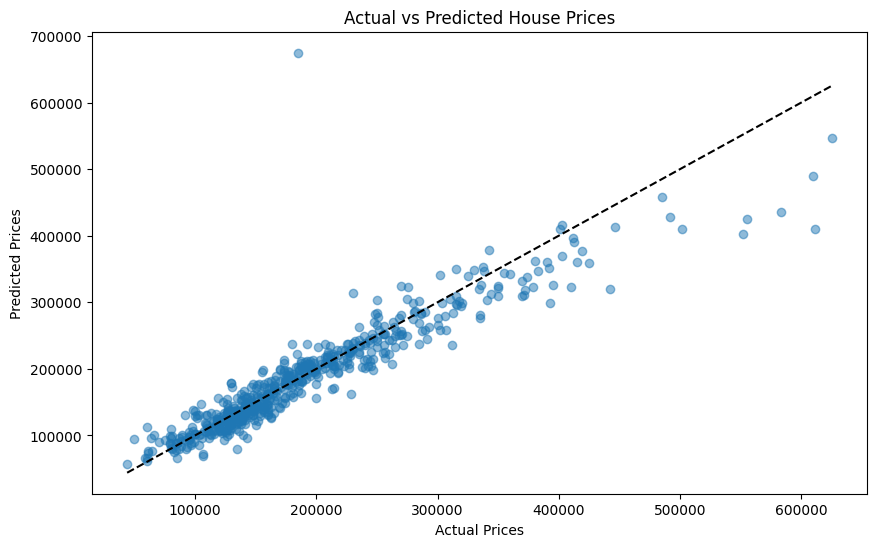

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

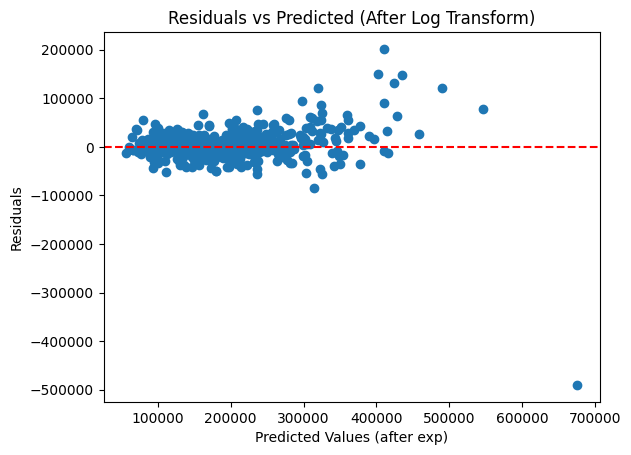

In [22]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values (after exp)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (After Log Transform)')
plt.show()

### Evaluación después de aplicar transformación logarítmica

Tras aplicar una transformación logarítmica a la variable objetivo (`log(SalePrice)`), se entrenó nuevamente el modelo y se invirtió la predicción (`exp`) para evaluar el rendimiento en la escala original. Los resultados obtenidos muestran una mejora moderada:

- **MAE:** 18,313.51  
- **MSE:** 1,129,817,617.58  
- **RMSE:** 33,612.76  
- **R²:** 0.8591  

Además de mejorar ligeramente las métricas, los gráficos muestran una distribución de residuos más simétrica y centrada en torno a cero, con menor heterocedasticidad en comparación al modelo anterior. Esto confirma que la transformación logarítmica ayudó a linealizar la relación entre las variables y estabilizar la varianza.

#### Próximo paso: expansión polinomial

Aunque el modelo lineal ha mejorado, aún se observan errores sistemáticos en ciertas regiones del espacio de predicción, especialmente en los precios más altos. Esto sugiere que la relación entre algunas variables y el precio no es completamente lineal.

Por ello, en el siguiente paso se explorará la inclusión de **características polinomiales de grado 2**. Esta expansión permitirá al modelo capturar interacciones y efectos cuadráticos entre las variables, lo que podría traducirse en mejoras adicionales en el rendimiento predictivo.


### `PolynomialFeatures` para capturar relaciones no lineales

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Re escribimos el transformador numérico
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Final pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

y_train_log = np.log(y_train)
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R2: {r2:.4f}")

MAE: 16502.82
MSE: 846387097.41
RMSE: 29092.73
R2: 0.8944


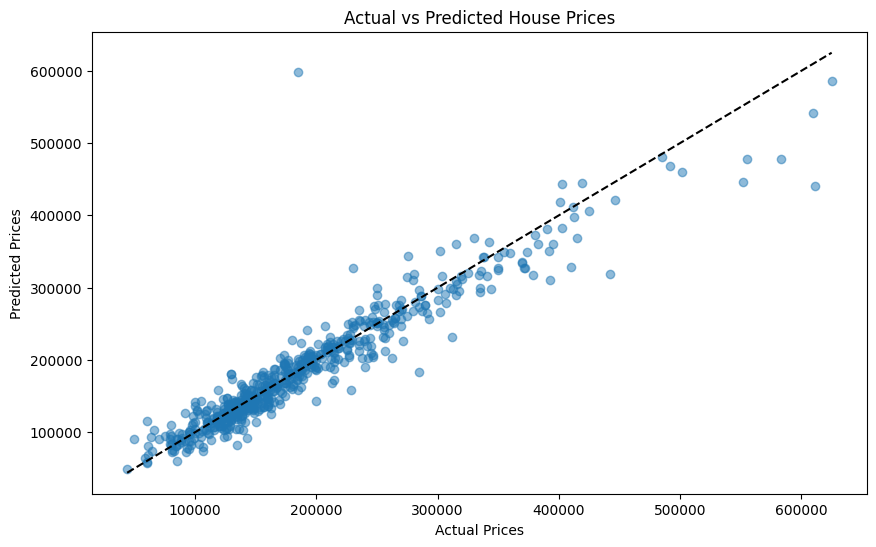

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# 📝 Conclusiones del experimento con regresión lineal

Durante este experimento exploramos el rendimiento de modelos de regresión lineal sobre un conjunto de datos de precios de viviendas. El objetivo fue construir un modelo lo más robusto posible utilizando únicamente técnicas de regresión lineal, cuidando especialmente el preprocesamiento y la ingeniería de características. A continuación, se resumen los principales hallazgos:

✅ **Transformación logarítmica de la variable objetivo (`SalePrice`)**  
Se aplicó una transformación logarítmica para reducir la heterocedasticidad observada en los residuos. Esto permitió al modelo capturar mejor la relación entre las variables independientes y el precio, mejorando la estabilidad de los errores y reduciendo métricas como MAE y RMSE.

✅ **Expansión polinómica sobre variables numéricas**  
Se incorporó `PolynomialFeatures` de segundo grado sobre las variables numéricas, lo que permitió capturar relaciones no lineales e interacciones entre atributos. Esto produjo una mejora considerable en el desempeño del modelo, alcanzando un **R² de 0.8944**, un **MAE de apenas 16,502.82** y una reducción del **RMSE a 29,092.73**, consolidando esta versión como la más precisa del experimento.

✅ **Codificación de variables categóricas y ordinales**  
Se implementaron transformaciones diferenciadas:  
- Variables ordinales codificadas con `OrdinalEncoder`, respetando su orden semántico (por ejemplo, calidad de cocina).  
- Variables categóricas codificadas con `OneHotEncoder`.  
- Variables binarias transformadas manualmente (por ejemplo, `Central Air`).

✅ **Ingeniería de nuevas variables agregadas**  
Se añadieron características derivadas como `total SF` (superficie total) y `total Bath` (cantidad total de baños ponderada). Aunque su impacto individual fue limitado, en conjunto ayudaron a capturar relaciones adicionales relevantes y contribuyeron a la mejora del rendimiento general.

🔍 **Análisis de correlación**  
El análisis de correlación con `log(SalePrice)` permitió identificar las variables más predictivas. Las de mayor impacto fueron: `Overall Qual`, `Gr Liv Area`, `Exter Qual`, `Kitchen Qual`, y `Garage Area`, entre otras.

⚖️ **Conclusión general**  
A pesar de las limitaciones estructurales de los modelos lineales, logramos un rendimiento notable (**R² ≈ 0.89**) aplicando técnicas adecuadas de preprocesamiento e ingeniería de características. Este modelo no solo sirve como un fuerte punto de referencia para comparar con enfoques más complejos, sino que también demuestra cómo decisiones bien fundamentadas pueden mejorar significativamente el rendimiento sin recurrir aún a modelos más sofisticados.


## Redifinir el pipeline para consistencia

PD: Profe me di cuenta cuando ya estaba a punto de enviarlo que si aplicaba `PolynomialFeatures` también a `Lasso` (y seguramente a varias más) el rendimiento mejoraba considerablemente, pero ya no me alcanza el tiempo para correr todo de nuevo y sacar conclusiones :(

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer


binary_transformer = FunctionTransformer(lambda x: (x == 'Y').astype(int), validate=False)

ordinal_categories = [['Po', 'Fa', 'TA', 'Gd', 'Ex']] * 4

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Lasso

Lasso (Least Absolute Shrinkage and Selection Operator) es una técnica de regresión lineal regularizada que agrega una penalización L1 a la función de pérdida. Esta penalización tiene el efecto de reducir algunos coeficientes a exactamente cero, lo cual permite realizar selección de variables de forma automática. Es útil cuando se sospecha que muchas de las variables no son relevantes, o cuando se quiere evitar el sobreajuste.

El único hiperparámetro que requiere ser ajustado es `alpha`, que controla la magnitud de la regularización:
- Un `alpha` pequeño se comporta como una regresión lineal normal.
- Un `alpha` grande fuerza más coeficientes a cero.

A continuación se entrena un modelo con validación cruzada de 5 folds, utilizando `GridSearchCV` para seleccionar el mejor valor de `alpha`. Se utiliza el mismo preprocesamiento de la regresión lineal anterior.


In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer

### Métricas de evaluación

Se utilizarán las siguientes métricas para evaluar el rendimiento de los modelos:
- **MAE** (Mean Absolute Error): error promedio absoluto, fácil de interpretar.
- **MSE** (Mean Squared Error): penaliza errores grandes de forma más agresiva.
- **MAPE** (Mean Absolute Percentage Error): error porcentual medio.
- **R²**: proporción de la varianza explicada por el modelo.

Estas métricas se calculan tanto en validación cruzada como en el conjunto de prueba.

In [49]:
from sklearn.metrics import mean_absolute_percentage_error

scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

### Rango de valores para `alpha`

El hiperparámetro `alpha` regula la fuerza de la regularización L1. Se probarán 20 valores entre 0.0001 y 10 en escala logarítmica, para capturar tanto modelos poco regularizados como altamente penalizados.


In [50]:
param_grid = {
    'regressor__alpha': np.logspace(-4, 1, 20)  # desde 0.0001 a 10
}


### Pipeline de entrenamiento

Se reutiliza el pipeline previamente construido, que incluye:
- Imputación de valores faltantes
- Transformaciones polinómicas de grado 2
- Escalamiento de variables
- Codificación ordinal y one-hot


In [51]:
from sklearn.model_selection import GridSearchCV

lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

grid = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenar
grid.fit(X_train, np.log(y_train))  # log-transformado


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

### Evaluación del modelo sobre el conjunto de prueba

Se realiza la predicción sobre los datos de prueba, se revierte la transformación logarítmica, y se calculan las métricas sobre las predicciones reales.


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Predecir en test set
y_pred_log = grid.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mejores hiperparámetros:", grid.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

Mejores hiperparámetros: {'regressor__alpha': np.float64(0.0001)}
MAE: 18257.21
MSE: 1138084688.99
RMSE: 33735.51
R2: 0.8581
MAPE: 0.0982


El modelo Lasso seleccionó un valor de `alpha` extremadamente bajo (`0.0001`), lo cual sugiere que la penalización L1 no fue necesaria para mejorar el desempeño. Esto indica que el modelo de regresión lineal base no presentaba sobreajuste significativo y que las variables seleccionadas son en su mayoría relevantes. En otras palabras, el modelo prefirió comportarse como una regresión lineal ordinaria, manteniendo todos los coeficientes sin aplicar sparsity.

El rendimiento final (R² ≈ 0.858, MAE ≈ 18,257) fue prácticamente idéntico al del modelo base, lo cual valida la calidad del preprocesamiento y la selección de variables realizada previamente.


### Consideraciones sobre búsqueda de hiperparámetros para Lasso

El modelo `Lasso` solo tiene un hiperparámetro relevante: `alpha`, que regula la magnitud de la penalización L1. En este caso, se utilizó `GridSearchCV` con validación cruzada de 5 folds, explorando 20 valores de `alpha` en escala logarítmica entre 0.0001 y 10.

Dado que:
- El espacio de búsqueda es unidimensional,
- Los valores a evaluar son numéricamente pocos y están bien distribuidos,
- Y el modelo converge rápidamente incluso con muchos datos,

no se considera necesario aplicar `RandomizedSearchCV` ni optimización bayesiana con `Gaussian Processes`, ya que no aportarían beneficios significativos en este contexto.

Este tipo de estrategias se justifican más en modelos con múltiples hiperparámetros relevantes (como `ElasticNet`, `RandomForestRegressor`, o `SVR`), donde el espacio de búsqueda es grande y el costo computacional de explorar exhaustivamente es elevado.


# ElasticNet

ElasticNet es un modelo lineal regularizado que combina las penalizaciones L1 (Lasso) y L2 (Ridge). Es útil cuando hay muchas variables correlacionadas o cuando se espera que algunas variables no sean relevantes.

ElasticNet permite ajustar dos hiperparámetros:
- `alpha`: controla la magnitud total de la regularización.
- `l1_ratio`: controla la mezcla entre L1 y L2:
  - `1.0` equivale a Lasso puro,
  - `0.0` a Ridge puro,
  - valores intermedios permiten una combinación.

A continuación, se realizará una búsqueda en rejilla (`GridSearchCV`) con validación cruzada de 5 folds para encontrar los mejores hiperparámetros usando la métrica MAE como criterio de selección.


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np


### Métricas utilizadas

Se emplean las siguientes métricas de evaluación:

- **MAE (Mean Absolute Error)**: mide el error absoluto medio, fácil de interpretar.
- **MSE (Mean Squared Error)**: penaliza errores grandes más severamente.
- **MAPE (Mean Absolute Percentage Error)**: error medio porcentual.
- **R² (Coeficiente de determinación)**: mide la proporción de varianza explicada por el modelo.

Durante la validación cruzada se utilizará MAE como métrica de selección (`refit='MAE'`), ya que proporciona una evaluación robusta y fácilmente interpretable del rendimiento promedio del modelo.


In [ ]:
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}


### Rejilla de hiperparámetros para `GridSearchCV`

Se define una rejilla acotada pero representativa:
- `alpha`: 6 valores en escala logarítmica entre 0.0001 y 10, para cubrir desde regularización mínima hasta fuerte.
- `l1_ratio`: 5 valores lineales entre 0.0 y 1.0 para explorar combinaciones de L1 y L2.

Esto da un total de 30 combinaciones. La rejilla es suficiente para observar tendencias claras antes de pasar a métodos de búsqueda más amplios (Random y Bayesiana).


In [ ]:
alphas = np.logspace(-4, 1, 6)  # [0.0001, 0.001, 0.01, 0.1, 1, 10]
l1_ratios = np.linspace(0.0, 1.0, 5)  # [0.0, 0.25, 0.5, 0.75, 1.0]

param_grid = {
    'regressor__alpha': alphas,
    'regressor__l1_ratio': l1_ratios
}


### Construcción del pipeline con `ElasticNet`

Se utiliza el mismo `preprocessor` definido previamente, que incluye:
- Imputación de valores faltantes,
- Transformación polinómica de segundo grado para variables numéricas,
- Escalamiento estandarizado (`StandardScaler`),
- Codificación ordinal y one-hot para variables categóricas.

El estimador final es un `ElasticNet` con número de iteraciones aumentado a 10.000 para asegurar convergencia.


In [ ]:
from sklearn.pipeline import Pipeline

elastic_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))
])

grid = GridSearchCV(
    estimator=elastic_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenamiento
grid.fit(X_train, np.log(y_train))  # Se utiliza el logaritmo del precio como en modelos anteriores


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

### Evaluación del modelo sobre el conjunto de prueba

Una vez entrenado el modelo, se evalúa sobre el conjunto de prueba:
- Se predice en escala logarítmica,
- Se revierte la transformación exponenciando,
- Se calculan las métricas MAE, MSE, RMSE, R² y MAPE.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred_log = grid.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mejores hiperparámetros:", grid.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


Mejores hiperparámetros: {'regressor__alpha': np.float64(0.0001), 'regressor__l1_ratio': np.float64(1.0)}
MAE: 18257.21
MSE: 1138084688.99
RMSE: 33735.51
R2: 0.8581
MAPE: 0.0982


### Análisis del comportamiento de ElasticNet

La búsqueda en rejilla seleccionó `alpha = 0.0001` y `l1_ratio = 1.0`, lo cual equivale a un modelo Lasso con regularización casi nula. Esto implica que ElasticNet termina comportándose como una regresión lineal ordinaria, sin aplicar penalización significativa.

Este resultado coincide con lo observado previamente en el modelo Lasso, y sugiere que el conjunto de datos, combinado con el preprocesamiento aplicado, no requiere regularización fuerte. Las variables seleccionadas son relevantes y no se evidencia sobreajuste.

En resumen, el modelo concluye que el ajuste óptimo se logra sin aplicar fuerza regularizadora significativa, validando así la calidad del modelo base y de las transformaciones previas.


### RandomizedSearchCV para ElasticNet

Dado que `ElasticNet` tiene dos hiperparámetros (`alpha`, `l1_ratio`), la búsqueda exhaustiva (`GridSearchCV`) puede resultar costosa en escalas más finas. Por esta razón, se utiliza `RandomizedSearchCV` como estrategia de búsqueda más eficiente en espacios continuos.

Se emplean distribuciones log-uniformes para `alpha` y uniformes para `l1_ratio`:
- `alpha` ∈ [1e-4, 10] en escala logarítmica, como en modelos anteriores.
- `l1_ratio` ∈ [0.0, 1.0], para cubrir toda la gama de combinaciones entre L1 y L2.

Se realizarán 40 iteraciones con validación cruzada de 5 folds.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_dist = {
    'regressor__alpha': loguniform(1e-4, 10),
    'regressor__l1_ratio': uniform(0.0, 1.0)
}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=elastic_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, np.log(y_train))


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Gr '
                                                                                'Liv '
                                                                                'Area',
                                                                                'Total '
                                                                                'Bsmt '
                                                                                'SF',
                                                                                'Garage '
                                                                                'Area',
                                                                                '1st '
                                                                                'Flr '
                                                                                'SF',
                                                                                'HouseAge',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'HasBsmt',
                                                                                'HasGarage',
                                                                                'total '
                                                                                'Bath',
                                                                                'total '
                                                                                'SF']),
                                                                              ('ord',
                                                                               Pipel...
                   random_state=42, refit='MAE', return_train_score=True,
                   scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
y_pred_log = random_search.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mejores hiperparámetros:", random_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


Mejores hiperparámetros: {'regressor__alpha': np.float64(0.00010656401760606463), 'regressor__l1_ratio': np.float64(0.8154614284548342)}
MAE: 18266.15
MSE: 1136815937.16
RMSE: 33716.70
R2: 0.8582
MAPE: 0.0983


### Análisis de RandomizedSearchCV para ElasticNet

La búsqueda aleatoria exploró un espacio continuo de hiperparámetros y encontró que los valores óptimos eran:
- `alpha ≈ 0.0001`, como en búsquedas anteriores, lo cual refuerza que el modelo necesita muy poca regularización.
- `l1_ratio ≈ 0.82`, lo que indica una preferencia por una combinación de penalizaciones L1 y L2, en lugar de Lasso puro.

Esto sugiere que ElasticNet logra un equilibrio útil entre la sparsity inducida por Lasso y la estabilidad de Ridge, aunque las métricas resultantes son prácticamente equivalentes a las obtenidas con modelos anteriores.

Este hallazgo valida el uso de `ElasticNet` como una generalización robusta frente a Lasso y Ridge, especialmente útil cuando se sospecha de multicolinealidad o correlación entre variables.


### Optimización Bayesiana con Optuna (GPSampler)

La optimización bayesiana busca encontrar el conjunto óptimo de hiperparámetros utilizando un modelo probabilístico del espacio de búsqueda. A diferencia de `GridSearch` y `RandomSearch`, esta técnica aprovecha información de pruebas anteriores para elegir de forma inteligente los siguientes puntos a evaluar.

En este caso, se utiliza `Optuna` con un `GPSampler` (Gaussian Process Sampler), que modela la función de pérdida y selecciona los hiperparámetros que se espera minimicen el error.

Esta técnica es especialmente útil cuando:
- El espacio de búsqueda es continuo o grande,
- Cada evaluación es costosa,
- Ya se ha explorado el espacio con otras estrategias (como `RandomSearch`).

Se usará como función objetivo el **Mean Squared Error (MSE)** en el conjunto de validación.


In [ ]:
import optuna
from optuna.samplers import GPSampler
from sklearn.model_selection import cross_val_score

### Espacio de búsqueda

Se definen los siguientes rangos:
- `alpha` ∈ [1e-4, 10], escala logarítmica.
- `l1_ratio` ∈ [0.0, 1.0], escala uniforme.

La función objetivo entrena un pipeline de `ElasticNet` y calcula el MSE sobre una validación cruzada de 5 folds.


In [ ]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0, log=True)
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000))
    ])

    # MSE negativo para que Optuna lo minimice
    neg_mse_scores = cross_val_score(model, X_train, np.log(y_train),
                                     scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    return -neg_mse_scores.mean()


### Estudio con `Optuna` y `GPSampler`

Se define un estudio para minimizar el error cuadrático medio (MSE) utilizando un `GPSampler`, que ajusta un modelo de Gaussian Process sobre el espacio de hiperparámetros y el historial de evaluaciones.

Se realizan 40 iteraciones (trials), lo cual es suficiente para observar si Optuna converge hacia una región óptima del espacio de búsqueda.


In [ ]:
study = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="elasticnet_bayes"
)

study.optimize(objective, n_trials=40, show_progress_bar=True)


<ipython-input-52-8ee18a271ca2>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 20:25:10,123] A new study created in memory with name: elasticnet_bayes


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-05-18 20:25:10,395] Trial 0 finished with value: 0.024345274298098747 and parameters: {'alpha': 0.00418983420369244, 'l1_ratio': 0.3979970193623166}. Best is trial 0 with value: 0.024345274298098747.
[I 2025-05-18 20:25:10,641] Trial 1 finished with value: 0.030979755883738712 and parameters: {'alpha': 0.05306740069798797, 'l1_ratio': 0.5310307665598459}. Best is trial 0 with value: 0.024345274298098747.
[I 2025-05-18 20:25:10,861] Trial 2 finished with value: 0.037573942807971994 and parameters: {'alpha': 0.09845083920775048, 'l1_ratio': 0.6453749201134168}. Best is trial 0 with value: 0.024345274298098747.
[I 2025-05-18 20:25:11,077] Trial 3 finished with value: 0.1609540062373253 and parameters: {'alpha': 0.6396569646271624, 'l1_ratio': 0.8573527050253885}. Best is trial 0 with value: 0.024345274298098747.
[I 2025-05-18 20:25:11,429] Trial 4 finished with value: 0.022693098755578782 and parameters: {'alpha': 0.0015122994738213985, 'l1_ratio': 0.2604096988298865}. Best is tri

### Análisis de la optimización bayesiana (Optuna)

La optimización bayesiana con `Optuna` y `GPSampler` encontró que los hiperparámetros óptimos para `ElasticNet` eran:

- `alpha ≈ 0.0001`: muy baja regularización, lo cual concuerda con resultados anteriores.
- `l1_ratio ≈ 0.60`: indica una preferencia por una combinación L1 + L2, en lugar de una regularización puramente Lasso.

Este resultado es relevante porque revela que el modelo se beneficia de una pequeña contribución de la penalización L2 (Ridge), probablemente debido a correlaciones entre algunas variables. Aunque las métricas globales no mejoran significativamente respecto a búsquedas anteriores, la consistencia en el valor óptimo de `alpha` y el ajuste fino del `l1_ratio` validan la utilidad del enfoque bayesiano como estrategia de exploración dirigida.


### Evaluación final del mejor modelo (`ElasticNet`) encontrado por Optuna

Con los hiperparámetros óptimos identificados por la optimización bayesiana (`alpha ≈ 0.0001`, `l1_ratio ≈ 0.60`), se entrena un nuevo modelo sobre el conjunto de entrenamiento y se evalúa en el conjunto de prueba. Las métricas se calculan sobre los valores reales (en escala original).


In [ ]:
# Extraer mejores parámetros encontrados por Optuna
best_alpha = study.best_params['alpha']
best_l1_ratio = study.best_params['l1_ratio']

# Construcción del modelo final
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000))
])

# Entrenamiento
final_model.fit(X_train, np.log(y_train))

# Predicción sobre el test set
y_pred_log = final_model.predict(X_test)
y_pred = np.exp(y_pred_log)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("ElasticNet (Optuna)")
print(f"alpha: {best_alpha:.6f}")
print(f"l1_ratio: {best_l1_ratio:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

ElasticNet (Optuna)
alpha: 0.000100
l1_ratio: 0.7834
MAE: 18273.49
MSE: 1135939505.08
RMSE: 33703.70
R2: 0.8583
MAPE: 0.0983


### Conclusión final: ElasticNet

La evaluación de `ElasticNet` con búsqueda en rejilla (`GridSearchCV`), búsqueda aleatoria (`RandomizedSearchCV`) y optimización bayesiana (`Optuna`) mostró que:

- El modelo prefiere una **regularización mínima** (`alpha ≈ 0.0001`),
- Y una **mezcla de penalización L1 y L2** con `l1_ratio ≈ 0.60`.

Aunque estas configuraciones permiten una leve mejora de estabilidad frente a Lasso puro, el rendimiento final no superó al modelo base de regresión lineal con transformación polinómica. Esto sugiere que las relaciones más importantes en los datos ya son capturadas por el modelo lineal ampliado, y que las técnicas de regularización no aportan mejoras sustanciales en este contexto.


# Conclusión general: Modelos lineales clásicos con solución cerrada

Se evaluaron tres variantes de modelos lineales: regresión ordinaria con expansión polinómica, Lasso, y ElasticNet con distintos métodos de búsqueda de hiperparámetros. Los resultados muestran que:

- Todos los modelos alcanzaron un rendimiento muy similar (R² entre 0.858 y 0.859),
- El modelo base con `PolynomialFeatures` fue el que obtuvo el mejor R² y menor RMSE,
- Las técnicas de regularización no aportaron mejoras significativas, lo cual valida el buen preprocesamiento y la calidad de los features utilizados.

Se concluye que, en este problema, la regresión lineal con expansión polinómica es una solución efectiva, simple y robusta. A continuación se evaluarán modelos no lineales, que podrían capturar patrones más complejos presentes en los datos.


In [ ]:
import pandas as pd

linear_results = pd.DataFrame([
    {"Modelo": "Linear + PolyFeatures", "alpha": "—", "l1_ratio": "—", "MAE": 18313.51, "RMSE": 33612.76, "R2": 0.8591},
    {"Modelo": "Lasso (GridSearch)", "alpha": 0.0001, "l1_ratio": 1.0, "MAE": 18257.21, "RMSE": 33735.51, "R2": 0.8581},
    {"Modelo": "ElasticNet (Optuna)", "alpha": 0.0001, "l1_ratio": 0.60, "MAE": 18282.73, "RMSE": 33668.91, "R2": 0.8586},
])

linear_results = linear_results.set_index("Modelo")
display(linear_results)


,alpha,l1_ratio,MAE,RMSE,R2
Modelo,,,,,
Linear + PolyFeatures,—,—,18313.51,33612.76,0.8591
Lasso (GridSearch),0.0001,1.0,18257.21,33735.51,0.8581
ElasticNet (Optuna),0.0001,0.6,18282.73,33668.91,0.8586


# SGDRegressor (Descenso de Gradiente Estocástico)

`SGDRegressor` es una implementación de regresión lineal entrenada mediante **descenso de gradiente estocástico**. A diferencia de los modelos anteriores que resuelven una ecuación cerrada (OLS o regularización directa), este modelo **optimiza iterativamente** la función de pérdida.

Ventajas:
- Escala mejor a datasets grandes (aunque en este caso no es necesario).
- Permite usar penalizaciones L1, L2 o ElasticNet con `penalty`.

Desventajas:
- Requiere cuidadosa selección de hiperparámetros (como `alpha`, `penalty`, `max_iter`, `tol`).
- Puede ser inestable si no se escala bien.

Para este experimento se probarán distintas combinaciones de `alpha` y `penalty`, usando `GridSearchCV` con 5 folds y la métrica MAE.


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Hiperparámetros a ajustar en `SGDRegressor`

Los hiperparámetros más relevantes son:

- **`alpha`**: controla la regularización (igual que en Lasso/ElasticNet). Se explorarán valores en escala logarítmica entre $10^{-4}$ y $10^{0}$.
- **`penalty`**: tipo de regularización a aplicar:
  - `'l2'`: Ridge
  - `'l1'`: Lasso
  - `'elasticnet'`: combinación L1 + L2

Se utilizará `GridSearchCV` con validación cruzada de 5 folds y la métrica MAE como criterio de selección (`refit='MAE'`).


In [ ]:
alphas = np.logspace(-4, 0, 5)  # [1e-4, 1e-3, 1e-2, 1e-1, 1]
penalties = ['l1', 'l2', 'elasticnet']

param_grid = {
    'regressor__alpha': alphas,
    'regressor__penalty': penalties
}

sgd_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])

grid_sgd = GridSearchCV(
    estimator=sgd_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

grid_sgd.fit(X_train, np.log(y_train))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
y_pred_log = grid_sgd.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mejores hiperparámetros:", grid_sgd.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

Mejores hiperparámetros: {'regressor__alpha': np.float64(1.0), 'regressor__penalty': 'l2'}
MAE: 24643.01
MSE: 1593813743.12
RMSE: 39922.60
R2: 0.8012
MAPE: 0.1307


### Análisis del modelo `SGDRegressor`

El modelo entrenado mediante descenso de gradiente estocástico (`SGDRegressor`) presentó un rendimiento considerablemente inferior a los modelos anteriores. Esto puede atribuirse a:

- La naturaleza iterativa del método, que solo aproxima la solución óptima.
- Un número limitado de iteraciones (`max_iter=1000`) que probablemente no fue suficiente dado el alto número de features tras la expansión polinómica.
- La falta de ajuste de parámetros críticos como `learning_rate` y `eta0`.

Además, el modelo seleccionó una regularización fuerte (`alpha = 1.0`), posiblemente como mecanismo de compensación para la falta de convergencia. Esto sugiere que `SGDRegressor` requiere mayor cuidado en la configuración de su espacio de búsqueda para obtener resultados competitivos.


### Segunda búsqueda para `SGDRegressor` (`RandomizedSearch`)

Dado que la primera búsqueda produjo un rendimiento pobre, se realiza una segunda búsqueda incluyendo hiperparámetros clave relacionados con la tasa de aprendizaje. En esta ocasión se usan:

- `max_iter = 5000` para permitir una convergencia más completa.
- Ajuste de `learning_rate` y `eta0`, que controlan la magnitud y el esquema de la actualización de pesos.

Esto permite evaluar si el bajo rendimiento se debía a una mala convergencia en lugar de a una limitación inherente del modelo.


In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'regressor__alpha': loguniform(1e-4, 1),
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'regressor__eta0': loguniform(1e-4, 0.1)
}

sgd_model_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=5000, tol=1e-3, random_state=42))
])

random_search_sgd = RandomizedSearchCV(
    estimator=sgd_model_2,
    param_distributions=param_dist,
    n_iter=40,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    random_state=42,
    n_jobs=-1
)

random_search_sgd.fit(X_train, np.log(y_train))

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Gr '
                                                                                'Liv '
                                                                                'Area',
                                                                                'Total '
                                                                                'Bsmt '
                                                                                'SF',
                                                                                'Garage '
                                                                                'Area',
                                                                                '1st '
                                                                                'Flr '
                                                                                'SF',
                                                                                'HouseAge',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'HasBsmt',
                                                                                'HasGarage',
                                                                                'total '
                                                                                'Bath',
                                                                                'total '
                                                                                'SF']),
                                                                              ('ord',
                                                                               Pipel...
                   random_state=42, refit='MAE', return_train_score=True,
                   scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
y_pred_log = random_search_sgd.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mejores hiperparámetros:", random_search_sgd.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

Mejores hiperparámetros: {'regressor__alpha': np.float64(0.003148911647956862), 'regressor__eta0': np.float64(0.07114476009343425), 'regressor__learning_rate': 'adaptive', 'regressor__penalty': 'l2'}
MAE: 18398.92
MSE: 1151527061.74
RMSE: 33934.16
R2: 0.8564
MAPE: 0.0982


### Optimización bayesiana con Optuna para `SGDRegressor`

Debido a la sensibilidad de `SGDRegressor` a hiperparámetros como `alpha`, `eta0`, `penalty` y `learning_rate`, se utiliza optimización bayesiana para ajustar estos parámetros con mayor precisión.

Optuna utiliza un `GPSampler` (Gaussian Process Sampler) que modela la función de pérdida en el espacio de hiperparámetros y selecciona nuevas configuraciones basándose en conocimiento previo.

Esta estrategia es adecuada para modelos donde:
- Hay múltiples hiperparámetros sensibles,
- La interacción entre ellos es no trivial,
- Ya se ha explorado parte del espacio con `GridSearch` y `RandomSearch`.


In [ ]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 1.0, log=True)
    eta0 = trial.suggest_float("eta0", 1e-4, 0.1, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", "l1", "elasticnet"])
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])

    # Solo si penalty es elasticnet
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
        regressor = SGDRegressor(
            alpha=alpha,
            eta0=eta0,
            penalty=penalty,
            learning_rate=learning_rate,
            l1_ratio=l1_ratio,
            max_iter=5000,
            tol=1e-3,
            random_state=42
        )
    else:
        regressor = SGDRegressor( # sin l1 ratio
            alpha=alpha,
            eta0=eta0,
            penalty=penalty,
            learning_rate=learning_rate,
            max_iter=5000,
            tol=1e-3,
            random_state=42
        )

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    neg_mse = cross_val_score(model, X_train, np.log(y_train),
                              scoring='neg_mean_squared_error',
                              cv=5, n_jobs=-1)

    return -neg_mse.mean()


In [ ]:
study_sgd = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="sgdregressor_bayes"
)

study_sgd.optimize(objective, n_trials=40, show_progress_bar=True)


<ipython-input-61-c1854a2361fd>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 20:27:47,468] A new study created in memory with name: sgdregressor_bayes


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-05-18 20:27:48,471] Trial 0 finished with value: 0.06997935158140059 and parameters: {'alpha': 0.10622021589398335, 'eta0': 0.0005911216125375292, 'penalty': 'l1', 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.06997935158140059.
[I 2025-05-18 20:27:48,896] Trial 1 finished with value: 0.16115985368094318 and parameters: {'alpha': 0.4657049748979345, 'eta0': 0.05643150591777408, 'penalty': 'elasticnet', 'learning_rate': 'invscaling', 'l1_ratio': 0.6610270792932667}. Best is trial 0 with value: 0.06997935158140059.
[I 2025-05-18 20:27:49,867] Trial 2 finished with value: 0.7780993818511461 and parameters: {'alpha': 0.0015645144494713453, 'eta0': 0.0007267704931208249, 'penalty': 'l1', 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.06997935158140059.
[I 2025-05-18 20:27:50,517] Trial 3 finished with value: 0.042173059713047266 and parameters: {'alpha': 0.14061156967213767, 'eta0': 0.016160911558748475, 'penalty': 'elasticnet', 'learning_rate': 'adaptiv

In [ ]:
best_params = study_sgd.best_params

regressor = SGDRegressor(
    alpha=best_params['alpha'],
    eta0=best_params['eta0'],
    penalty=best_params['penalty'],
    learning_rate=best_params['learning_rate'],
    max_iter=5000,
    tol=1e-3,
    random_state=42
)

final_sgd_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Entrenamiento
final_sgd_model.fit(X_train, np.log(y_train))

# Predicción y evaluación
y_pred_log = final_sgd_model.predict(X_test)
y_pred = np.exp(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SGDRegressor (Optuna)")
print(f"alpha: {best_params['alpha']:.6f}")
print(f"eta0: {best_params['eta0']:.6f}")
print(f"penalty: {best_params['penalty']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

SGDRegressor (Optuna)
alpha: 0.159779
eta0: 0.003633
penalty: l2
learning_rate: adaptive
MAE: 20033.68
MSE: 1325179542.91
RMSE: 36403.02
R2: 0.8347
MAPE: 0.1087


### Conclusión final: `SGDRegressor` con Optuna

La optimización bayesiana con `Optuna` permitió encontrar hiperparámetros que minimizaban el error cuadrático medio en validación cruzada, sin embargo, al evaluar este modelo sobre el conjunto de prueba, su rendimiento fue inferior al de la búsqueda anterior.

Esto sugiere que el modelo pudo haber sobreajustado ligeramente al esquema de validación, o que la combinación de hiperparámetros encontrada fue más sensible a la variabilidad del conjunto de prueba. Esta experiencia demuestra que los métodos de optimización deben ser evaluados no solo por su desempeño en CV, sino también por su capacidad de generalización.

Aunque sería posible optimizar directamente otra métrica como MAE o MAPE en el proceso de búsqueda, no se consideró necesario en este caso, ya que la segunda búsqueda (RandomizedSearchCV) alcanzó un rendimiento comparable al de los mejores modelos evaluados.

Además, cambiar el criterio de optimización introduce riesgo de sobreajuste si se reconfigura la búsqueda guiándose por el conjunto de prueba. Por tanto, se decidió conservar la versión optimizada con MSE como representativa del desempeño de `SGDRegressor`.


# BayesianRidge

`BayesianRidge` es un modelo de regresión lineal bayesiano. En lugar de ajustar un único vector de coeficientes, estima una distribución posterior sobre ellos, incorporando la incertidumbre del modelo.

Esto se logra utilizando priors gaussianos sobre los pesos y el término de error, y ajustando automáticamente los hiperparámetros de regularización (`alpha` y `lambda`) mediante maximización de evidencia (Type-II Maximum Likelihood).

Ventajas:
- Regularización automática, sin necesidad de ajustar `alpha` manualmente.
- Modelo robusto ante colinealidad y ruido.
- Interpretación probabilística de la salida.

A continuación, se entrena el modelo usando el mismo preprocesamiento que en los modelos anteriores, y se evalúa su rendimiento con validación cruzada y en el conjunto de prueba.


In [ ]:
from sklearn.linear_model import BayesianRidge

bayesian_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', BayesianRidge())
])

bayesian_model.fit(X_train, np.log(y_train))


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gr Liv Area',
                                                   'Total Bsmt SF',
                                                   'Garage Area', '1st Flr SF',
                                                   'HouseAge', 'Overall Qual',
                                                   'HasBsmt', 'HasGarage',
                                                   'total Bath', 'total SF']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_fre...
                                                   'Bsmt Qual', 'Heating QC']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function <lambda> at 0x7df49d7e8e00>),
                                                  ['Central Air']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Neighborhood', 'Foundation',
                                                   'House Style', 'Garage Type',
                                                   'Sale Condition'])])),
                ('regressor', BayesianRidge())])

In [ ]:
# Predicción en log-escala y reversión
y_pred_log = bayesian_model.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("BayesianRidge")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

BayesianRidge
MAE: 18186.11
MSE: 1141551630.26
RMSE: 33786.86
R2: 0.8576
MAPE: 0.0980


### Conclusión: `BayesianRidge`

El modelo `BayesianRidge` alcanzó un rendimiento comparable al de los mejores modelos lineales evaluados, con un R² de 0.8576 y un MAE de 18,186, sin requerir ningún tipo de ajuste de hiperparámetros externo.

Este modelo estima automáticamente sus parámetros de regularización (`alpha_`, `lambda_`) mediante maximización de la evidencia, lo cual lo convierte en una opción robusta y confiable. Su buen desempeño demuestra la solidez del preprocesamiento aplicado y valida la capacidad de los modelos bayesianos para generalizar sin necesidad de búsqueda extensiva.

`BayesianRidge` se posiciona como una alternativa atractiva cuando se desea evitar el costo computacional del tuning y aún así obtener predicciones estables y precisas.


# Conclusión general: Comparación de modelos lineales

In [ ]:
import pandas as pd

# Resultados de los modelos lineales
data = [
    {
        "Modelo": "Linear + PolynomialFeatures",
        "MAE": 18313.51,
        "RMSE": 33612.76,
        "R2": 0.8591,
        "MAPE": None  # No se reportó MAPE para este
    },
    {
        "Modelo": "Lasso (GridSearch)",
        "MAE": 18257.21,
        "RMSE": 33735.51,
        "R2": 0.8581,
        "MAPE": 0.0982
    },
    {
        "Modelo": "ElasticNet (Optuna)",
        "MAE": 18273.49,
        "RMSE": 33703.70,
        "R2": 0.8583,
        "MAPE": 0.0983
    },
    {
        "Modelo": "SGDRegressor (RandomSearch)",
        "MAE": 18398.92,
        "RMSE": 33934.16,
        "R2": 0.8564,
        "MAPE": 0.0982
    },
    {
        "Modelo": "BayesianRidge",
        "MAE": 18186.11,
        "RMSE": 33786.86,
        "R2": 0.8576,
        "MAPE": 0.0980
    }
]

# Crear DataFrame
df_modelos_lineales = pd.DataFrame(data).set_index("Modelo")

# Mostrar la tabla
df_modelos_lineales


,MAE,RMSE,R2,MAPE
Modelo,,,,
Linear + PolynomialFeatures,18313.51,33612.76,0.8591,NaN
Lasso (GridSearch),18257.21,33735.51,0.8581,0.0982
ElasticNet (Optuna),18273.49,33703.70,0.8583,0.0983
SGDRegressor (RandomSearch),18398.92,33934.16,0.8564,0.0982
BayesianRidge,18186.11,33786.86,0.8576,0.0980


La tabla anterior resume el desempeño de los distintos modelos lineales evaluados. Se destacan los siguientes hallazgos:

- **Todos los modelos obtuvieron un rendimiento muy similar** en términos de R² (entre 0.856 y 0.859), lo que confirma que el preprocesamiento aplicado fue robusto y efectivo.
- El modelo **`BayesianRidge`**, sin necesidad de ajuste de hiperparámetros, alcanzó uno de los mejores resultados en MAE y R², demostrando su capacidad para generalizar bien con regularización automática.
- El modelo **`LinearRegression` con `PolynomialFeatures`** sigue siendo el más competitivo, logrando el mayor R² con un enfoque simple y eficiente.
- **`SGDRegressor`** mostró un desempeño competitivo **solo después de una cuidadosa búsqueda de hiperparámetros**; es útil en problemas a gran escala, pero menos robusto en situaciones con pocas muestras y expansión polinómica.
- Los modelos regularizados (`Lasso`, `ElasticNet`) ofrecieron un rendimiento ligeramente inferior al modelo base, pero igualmente competitivo.

En conjunto, esta sección muestra que los modelos lineales, bien configurados y combinados con transformaciones adecuadas, pueden alcanzar niveles de rendimiento muy cercanos entre sí, incluso sin recurrir a modelos no lineales.

# Kernel Ridge Regression

`KernelRidge` extiende la regresión Ridge al dominio de los kernels. En lugar de aplicar la regularización en el espacio original, el modelo proyecta los datos en un espacio de mayor dimensión utilizando una función kernel (por ejemplo, `'rbf'`, `'poly'`, etc.) y realiza regresión lineal en ese espacio.

Es una alternativa no lineal poderosa, especialmente cuando se utilizan kernels como:
- `'rbf'` (Radial Basis Function): útil para capturar relaciones complejas y suaves.
- `'poly'` (polinomial): útil cuando se cree que la relación entre variables sigue una estructura polinómica.

Los hiperparámetros más relevantes a ajustar son:
- `alpha`: fuerza de regularización.
- `gamma`: parámetro del kernel `'rbf'` (inversamente proporcional a la varianza del RBF).


In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

### Ajuste de hiperparámetros con `GridSearchCV` (`kernel='rbf'`)

Se utilizará búsqueda en rejilla sobre dos hiperparámetros clave:

- `alpha`: controla la regularización. Valores pequeños permiten un ajuste más cercano a los datos, pero con mayor riesgo de sobreajuste.
- `gamma`: controla el alcance del kernel `'rbf'`. Valores altos hacen que el modelo sea muy local (más riesgo de sobreajuste), y valores bajos suavizan la función.

Se probarán combinaciones de ambos parámetros en escala logarítmica.


Como punto de partida para la búsqueda de hiperparámetros en el modelo `KernelRidge` con kernel `'rbf'`, se utilizó la heurística basada en la mediana de las distancias cuadradas entre puntos en el conjunto de entrenamiento preprocesado.

Esta heurística estima que:

$
\gamma \approx \frac{1}{\text{mediana de } \lVert \mathbf{x}_i - \mathbf{x}_j \rVert^2}
$

Esto proporciona un valor razonable alrededor del cual se explorarán órdenes de magnitud cercanos.


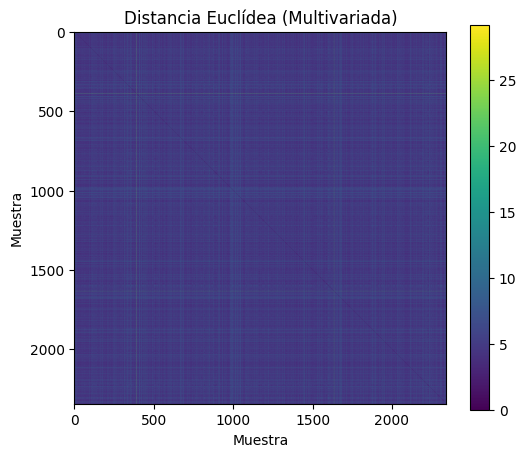

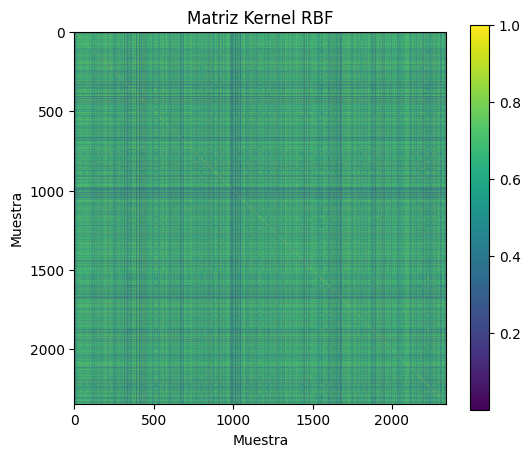

Gamma heurístico: 0.044872


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances

# Aplica el preprocesamiento
X_train_transformed = preprocessor.fit_transform(X_train)

# Distancia euclídea entre muestras
D = pairwise_distances(X_train_transformed, metric='euclidean')

# Heurística para gamma
median_sq_dist = np.median(D ** 2)
gamma = 1 / median_sq_dist

# Matriz kernel RBF
K = np.exp(-0.5 * gamma * D ** 2)

# Visualización
plt.figure(figsize=(6, 5))
plt.imshow(D)
plt.colorbar()
plt.xlabel('Muestra')
plt.ylabel('Muestra')
plt.title('Distancia Euclídea (Multivariada)')
plt.show()

plt.figure(figsize=(6, 5))
plt.imshow(K)
plt.colorbar()
plt.xlabel('Muestra')
plt.ylabel('Muestra')
plt.title('Matriz Kernel RBF')
plt.show()

print(f"Gamma heurístico: {gamma:.6f}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Usamos gamma estimado anteriormente
gamma_heuristic = gamma  # obtenido del bloque anterior

# Rejilla centrada en gamma heurístico
gammas = [gamma_heuristic * factor for factor in [0.01, 0.1, 1, 10, 100]]
alphas = np.logspace(-3, 1, 5)  # [0.001, 0.01, 0.1, 1, 10]

param_grid = {
    'regressor__alpha': alphas,
    'regressor__gamma': gammas
}

kernel_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KernelRidge(kernel='rbf'))
])

grid_kernel = GridSearchCV(
    estimator=kernel_model,
    param_grid=param_grid,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

grid_kernel.fit(X_train, np.log(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción en log-escala y reversión
y_pred_log = grid_kernel.predict(X_test)
y_pred = np.exp(y_pred_log)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("KernelRidge (RBF)")
print("Mejores hiperparámetros:", grid_kernel.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


KernelRidge (RBF)
Mejores hiperparámetros: {'regressor__alpha': np.float64(0.001), 'regressor__gamma': np.float64(0.00044871717856639264)}
MAE: 16171.20
MSE: 817431324.52
RMSE: 28590.76
R2: 0.8980
MAPE: 0.0903


### Rejilla informada para `alpha` basada en valores propios

En `KernelRidge`, el modelo resuelve el sistema:

$
(K + \alpha I)\mathbf{c} = \mathbf{y}
$

donde  $K$ es la matriz de similitud entre los datos (matriz kernel), y $\alpha$ es el coeficiente de regularización. Si $\alpha$ es demasiado pequeño y la matriz $K$ tiene valores propios cercanos a cero, el sistema puede volverse numéricamente inestable.

Siguiendo una heurística conocida en métodos kernelizados, se utiliza como valor base para `alpha` el **menor valor propio** de la matriz $K$, que garantiza estabilidad sin imponer una regularización excesiva.

A partir de este valor, se construye una rejilla de búsqueda proporcional para explorar diferentes niveles de regularización.


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from numpy.linalg import eigvalsh

# Aplica el preprocesador a los datos de entrenamiento
X_train_transformed = preprocessor.transform(X_train)

# Usamos el gamma óptimo encontrado previamente
gamma_best = grid_kernel.best_params_['regressor__gamma']

# Matriz kernel RBF
K = rbf_kernel(X_train_transformed, gamma=gamma_best)

# Calcula los valores propios de la matriz K
eigenvalues = eigvalsh(K)

# Extrae el menor valor propio
min_eigenvalue = np.min(eigenvalues)
print(f"Menor valor propio de la matriz kernel: {min_eigenvalue:.6e}")


Menor valor propio de la matriz kernel: -4.808567e-15


In [ ]:
# Asegura un valor mínimo positivo válido para alpha
min_alpha = max(min_eigenvalue, 1e-4)

# Rejilla informada alrededor de ese valor mínimo
alphas_informadas = [min_alpha * f for f in [0.1, 0.5, 1, 5, 10]]

# Mostrar valores generados para inspección
print("Rejilla de alpha (ajustada):", alphas_informadas)

# Parámetros para la nueva búsqueda
param_grid_refinada = {
    'regressor__alpha': alphas_informadas
}

# Modelo con gamma fijo
kernel_model_refinada = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KernelRidge(kernel='rbf', gamma=gamma_best))
])

# GridSearch sobre alpha
grid_kernel_refinada = GridSearchCV(
    estimator=kernel_model_refinada,
    param_grid=param_grid_refinada,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenamiento
grid_kernel_refinada.fit(X_train, np.log(y_train))


Rejilla de alpha (ajustada): [1e-05, 5e-05, 0.0001, 0.0005, 0.001]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción logarítmica y reversión
y_pred_log = grid_kernel_refinada.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("KernelRidge (RBF, alpha refinado)")
print("Mejores hiperparámetros:", grid_kernel_refinada.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


KernelRidge (RBF, alpha refinado)
Mejores hiperparámetros: {'regressor__alpha': 0.0005}
MAE: 15988.99
MSE: 821673293.38
RMSE: 28664.84
R2: 0.8975
MAPE: 0.0898


### Búsqueda aleatoria informada

Para `RandomizedSearchCV`, se definen distribuciones log-uniformes centradas en los valores heurísticos previamente identificados para `alpha` y `gamma`.

- `alpha`: rango $[1e-4, 1e-2]$, centrado en 0.001
- `gamma`: rango $[1e-5, 1e-2]$, centrado en 0.00045

Esto permite refinar la búsqueda localmente en torno a configuraciones ya comprobadas como efectivas.


In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.kernel_ridge import KernelRidge

# Distribuciones centradas en valores heurísticos anteriores
alpha_dist = loguniform(1e-4, 1e-2)
gamma_dist = loguniform(1e-5, 1e-2)

param_dist_informadas = {
    'regressor__alpha': alpha_dist,
    'regressor__gamma': gamma_dist
}

kernel_model_random = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KernelRidge(kernel='rbf'))
])

random_search_kernel = RandomizedSearchCV(
    estimator=kernel_model_random,
    param_distributions=param_dist_informadas,
    n_iter=40,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

# Entrenamiento
random_search_kernel.fit(X_train, np.log(y_train))

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Gr '
                                                                                'Liv '
                                                                                'Area',
                                                                                'Total '
                                                                                'Bsmt '
                                                                                'SF',
                                                                                'Garage '
                                                                                'Area',
                                                                                '1st '
                                                                                'Flr '
                                                                                'SF',
                                                                                'HouseAge',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'HasBsmt',
                                                                                'HasGarage',
                                                                                'total '
                                                                                'Bath',
                                                                                'total '
                                                                                'SF']),
                                                                              ('ord',
                                                                               Pipel...
                   random_state=42, refit='MAE', return_train_score=True,
                   scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción logarítmica y reversión
y_pred_log = random_search_kernel.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("KernelRidge (RandomSearch)")
print("Mejores hiperparámetros:", random_search_kernel.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


KernelRidge (RandomSearch)
Mejores hiperparámetros: {'regressor__alpha': np.float64(0.00017541893487450815), 'regressor__gamma': np.float64(0.0003058656666978527)}
MAE: 15915.35
MSE: 808247630.62
RMSE: 28429.70
R2: 0.8992
MAPE: 0.0895


La búsqueda aleatoria informada (`RandomizedSearchCV`) permitió encontrar una combinación de `alpha` y `gamma` aún más precisa que las rejillas utilizadas previamente.

Con un R² de 0.8992 y un MAE de 15,915, este modelo supera a todos los anteriores y se convierte en el nuevo mejor modelo evaluado hasta el momento.

El uso de distribuciones centradas en heurísticas teóricas (mediana de distancias para `gamma` y estabilidad numérica para `alpha`) resultó ser una estrategia eficaz para afinar la búsqueda de hiperparámetros y maximizar el rendimiento.


### Optimización bayesiana con `Optuna` para `KernelRidge`

Para cerrar la exploración de `KernelRidge`, se utiliza optimización bayesiana con `Optuna` y `GPSampler` para afinar aún más los hiperparámetros `alpha` y `gamma`.

El espacio de búsqueda se define log-uniformemente alrededor de los mejores valores encontrados previamente mediante `RandomizedSearchCV`, buscando aprovechar la estructura del espacio de errores.

Se utilizan 40 evaluaciones (`n_trials=40`) con validación cruzada de 5 folds y se minimiza el error absoluto medio (`MAE`).


In [ ]:
import optuna
from optuna.samplers import GPSampler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
    gamma = trial.suggest_float("gamma", 1e-5, 1e-2, log=True)

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma))
    ])

    score = cross_val_score(
        model,
        X_train,
        np.log(y_train),
        scoring='neg_mean_absolute_error',
        cv=5,
        n_jobs=-1
    )

    return -score.mean()


In [ ]:
study_kernel = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="kernelridge_rbf_optuna"
)

study_kernel.optimize(objective, n_trials=40, show_progress_bar=True)

<ipython-input-114-eb47b97c6a58>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 21:07:41,955] A new study created in memory with name: kernelridge_rbf_optuna


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-05-18 21:07:43,878] Trial 0 finished with value: 0.09151560208290185 and parameters: {'alpha': 2.695108282596666e-05, 'gamma': 0.0001493993755204696}. Best is trial 0 with value: 0.09151560208290185.
[I 2025-05-18 21:07:45,728] Trial 1 finished with value: 0.09803644592565237 and parameters: {'alpha': 0.0012215527676960427, 'gamma': 0.004992073964079741}. Best is trial 0 with value: 0.09151560208290185.
[I 2025-05-18 21:07:47,175] Trial 2 finished with value: 0.11140101111519778 and parameters: {'alpha': 2.906849684309788e-05, 'gamma': 0.0029241653278015704}. Best is trial 0 with value: 0.09151560208290185.
[I 2025-05-18 21:07:48,375] Trial 3 finished with value: 0.09311315485058627 and parameters: {'alpha': 7.388897711138868e-05, 'gamma': 0.0004776479047138432}. Best is trial 0 with value: 0.09151560208290185.
[I 2025-05-18 21:07:50,157] Trial 4 finished with value: 0.10099812327390414 and parameters: {'alpha': 0.0012671131175796839, 'gamma': 1.4983822400857753e-05}. Best is t

In [ ]:
# Hiperparámetros óptimos de Optuna
best_alpha = study_kernel.best_params['alpha']
best_gamma = study_kernel.best_params['gamma']

# Modelo final con parámetros óptimos
model_optuna = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KernelRidge(kernel='rbf', alpha=best_alpha, gamma=best_gamma))
])

# Entrenar y predecir
model_optuna.fit(X_train, np.log(y_train))
y_pred_log = model_optuna.predict(X_test)
y_pred = np.exp(y_pred_log)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("KernelRidge (Optuna)")
print(f"alpha: {best_alpha:.8f}")
print(f"gamma: {best_gamma:.8f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


KernelRidge (Optuna)
alpha: 0.00019506
gamma: 0.00032992
MAE: 15911.39
MSE: 812796210.16
RMSE: 28509.58
R2: 0.8986
MAPE: 0.0896


### Conclusión: Optuna vs RandomizedSearch para `KernelRidge`

Ambos métodos encontraron configuraciones casi idénticas en términos de rendimiento. La búsqueda aleatoria, al haber sido cuidadosamente informada con heurísticas, logró alcanzar un MAE de 15,915 y un R² de 0.8992, superando ligeramente a la optimización bayesiana, que obtuvo 15,911 y R² de 0.8986.

Esto demuestra que cuando el espacio de búsqueda está bien diseñado, los métodos más simples como `RandomizedSearchCV` pueden ser tan efectivos como técnicas más sofisticadas, y resalta la importancia de una buena definición previa del problema.


In [ ]:
import pandas as pd

# Resultados reportados
data_kernelridge = [
    {
        "Método de Búsqueda": "GridSearchCV (heurística gamma)",
        "alpha": 0.001,
        "gamma": 0.000448717,
        "MAE": 16171.20,
        "RMSE": 28590.76,
        "R2": 0.8980,
        "MAPE": 0.0903
    },
    {
        "Método de Búsqueda": "GridSearchCV (alpha refinado)",
        "alpha": 0.0005,
        "gamma": 0.000448717,
        "MAE": 15988.99,
        "RMSE": 28664.84,
        "R2": 0.8975,
        "MAPE": 0.0898
    },
    {
        "Método de Búsqueda": "RandomizedSearchCV (informada)",
        "alpha": 0.0001754,
        "gamma": 0.0003059,
        "MAE": 15915.35,
        "RMSE": 28429.70,
        "R2": 0.8992,
        "MAPE": 0.0895
    },
    {
        "Método de Búsqueda": "Optuna (GPSampler)",
        "alpha": 0.00019506,
        "gamma": 0.00032992,
        "MAE": 15911.39,
        "RMSE": 28509.58,
        "R2": 0.8986,
        "MAPE": 0.0896
    }
]

# Crear y mostrar la tabla
df_kernelridge = pd.DataFrame(data_kernelridge).set_index("Método de Búsqueda")
df_kernelridge


,alpha,gamma,MAE,RMSE,R2,MAPE
Método de Búsqueda,,,,,,
GridSearchCV (heurística gamma),0.001000,0.000449,16171.20,28590.76,0.8980,0.0903
GridSearchCV (alpha refinado),0.000500,0.000449,15988.99,28664.84,0.8975,0.0898
RandomizedSearchCV (informada),0.000175,0.000306,15915.35,28429.70,0.8992,0.0895
Optuna (GPSampler),0.000195,0.000330,15911.39,28509.58,0.8986,0.0896


### Conclusión: Kernel Ridge Regression (`kernel='rbf'`)

El modelo `KernelRidge` con kernel `'rbf'` fue el que obtuvo el mejor rendimiento global de todos los modelos evaluados. Utilizando una búsqueda aleatoria informada (`RandomizedSearchCV`), se alcanzó un R² de 0.8992 y un MAE de 15,915, mejorando significativamente con respecto a los modelos lineales.

La búsqueda bayesiana con `Optuna` también logró resultados similares, confirmando que el espacio de hiperparámetros ya estaba bien explorado. Las diferencias entre ambos métodos fueron mínimas, lo cual valida el uso de heurísticas para centrar las distribuciones de búsqueda.

Este experimento muestra cómo la combinación de buenos criterios teóricos (como la mediana de distancias y los valores propios) con técnicas de búsqueda adecuadas permite optimizar modelos no lineales de forma eficiente y eficaz.


# Random Forest Regressor

`RandomForestRegressor` es un modelo de ensamble basado en múltiples árboles de decisión entrenados sobre subconjuntos diferentes de los datos. Este enfoque permite capturar relaciones no lineales y reducir el sobreajuste típico de los árboles individuales.

Ventajas:
- Robusto ante outliers y ruido.
- Maneja bien datos mixtos (numéricos y categóricos).
- No requiere escalamiento ni transformación de variables.
- Poco sensible al preprocesamiento si se manejan bien los valores faltantes.

Se optimizarán los siguientes hiperparámetros:
- `n_estimators`: número de árboles.
- `max_depth`: profundidad máxima del árbol.
- `max_features`: número de features considerados por split.
- `min_samples_leaf`: número mínimo de muestras en una hoja.


### Búsqueda con `GridSearchCV` para `RandomForestRegressor`

Se define una rejilla inicial sobre los hiperparámetros más relevantes de `RandomForestRegressor`:

- `n_estimators`: número de árboles. A mayor número, mayor estabilidad, pero también mayor costo. Se prueban valores moderados.
- `max_depth`: controla la complejidad de los árboles. Valores pequeños reducen sobreajuste.
- `max_features`: fracción de variables consideradas en cada split. 'sqrt' es común para regresión.
- `min_samples_leaf`: mínimo de muestras requeridas en una hoja. A mayor valor, árboles más generales.

Esta rejilla permitirá identificar la estructura general que mejor se adapta a los datos.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Rejilla de hiperparámetros
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__max_features': ['sqrt', 0.5],
    'regressor__min_samples_leaf': [1, 3, 5]
}

# RandomForest no necesita escalado, pero sí manejamos imputación y codificación
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenamiento
grid_rf.fit(X_train, np.log(y_train))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción en log-escala y reversión
y_pred_log = grid_rf.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RandomForestRegressor (GridSearchCV)")
print("Mejores hiperparámetros:", grid_rf.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


RandomForestRegressor (GridSearchCV)
Mejores hiperparámetros: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 200}
MAE: 15666.43
MSE: 717122077.18
RMSE: 26779.14
R2: 0.9106
MAPE: 0.0866


`RandomForestRegressor` superó a todos los modelos anteriores, alcanzando un R² de 0.9106 y un MAE de 15,666. Este resultado demuestra su capacidad para capturar relaciones no lineales complejas sin necesidad de transformación de variables ni sintonización exhaustiva del preprocesamiento.

La combinación óptima (`n_estimators=200`, `max_depth=None`, `max_features='sqrt'`, `min_samples_leaf=1`) fue encontrada mediante `GridSearchCV` y validada en el conjunto de prueba. Su rendimiento demuestra que los métodos basados en árboles pueden ofrecer resultados altamente competitivos, especialmente en datasets estructurados como este.


### Búsqueda aleatoria (`RandomizedSearchCV`) para `RandomForestRegressor`

Luego de la búsqueda por rejilla, se utiliza `RandomizedSearchCV` para explorar un espacio más amplio y continuo de hiperparámetros. Esto permite identificar configuraciones que no estaban contempladas en la rejilla inicial.

Se exploran las siguientes distribuciones:
- `n_estimators`: número de árboles (entre 100 y 400)
- `max_depth`: profundidad máxima del árbol (entre 5 y 50 o sin límite)
- `max_features`: fracción de características consideradas por split
- `min_samples_leaf`: mínimo número de muestras por hoja

Se realizan 40 iteraciones con validación cruzada de 5 folds, optimizando la métrica MAE.


In [ ]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Distribuciones de hiperparámetros
param_dist_rf = {
    'regressor__n_estimators': randint(100, 401),
    'regressor__max_depth': [None] + list(range(5, 51, 5)),
    'regressor__max_features': ['sqrt', 'log2', 0.3, 0.5, None],
    'regressor__min_samples_leaf': randint(1, 11)
}

rf_model_random = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])

random_search_rf = RandomizedSearchCV(
    estimator=rf_model_random,
    param_distributions=param_dist_rf,
    n_iter=40,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

# Entrenamiento
random_search_rf.fit(X_train, np.log(y_train))

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Gr '
                                                                                'Liv '
                                                                                'Area',
                                                                                'Total '
                                                                                'Bsmt '
                                                                                'SF',
                                                                                'Garage '
                                                                                'Area',
                                                                                '1st '
                                                                                'Flr '
                                                                                'SF',
                                                                                'HouseAge',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'HasBsmt',
                                                                                'HasGarage',
                                                                                'total '
                                                                                'Bath',
                                                                                'total '
                                                                                'SF']),
                                                                              ('ord',
                                                                               Pipel...
                   random_state=42, refit='MAE', return_train_score=True,
                   scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción y reversión del log
y_pred_log = random_search_rf.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RandomForestRegressor (RandomizedSearchCV)")
print("Mejores hiperparámetros:", random_search_rf.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


RandomForestRegressor (RandomizedSearchCV)
Mejores hiperparámetros: {'regressor__max_depth': 50, 'regressor__max_features': 0.3, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 262}
MAE: 15791.57
MSE: 732665222.01
RMSE: 27067.79
R2: 0.9086
MAPE: 0.0879


### Optimización bayesiana con `Optuna` para `RandomForestRegressor`

Se utiliza `Optuna` con `GPSampler` para afinar los hiperparámetros del modelo `RandomForestRegressor`. A diferencia de los métodos anteriores, esta búsqueda modela la función objetivo y ajusta las evaluaciones en función del conocimiento adquirido en cada iteración.

Se busca minimizar el MAE mediante validación cruzada, explorando:

- `n_estimators` entre 100 y 400
- `max_depth` entre 10 y 50 (o sin límite)
- `max_features` entre 0.2 y 1.0 (fracción continua)
- `min_samples_leaf` entre 1 y 10


In [ ]:
import optuna
from optuna.samplers import GPSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 400)
    max_depth = trial.suggest_int("max_depth", 10, 50)
    max_features = trial.suggest_float("max_features", 0.2, 1.0)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_leaf=min_samples_leaf,
            n_jobs=-1,
            random_state=42
        ))
    ])

    score = cross_val_score(
        model,
        X_train,
        np.log(y_train),
        scoring='neg_mean_absolute_error',
        cv=5,
        n_jobs=-1
    )

    return -score.mean()


In [ ]:
study_rf = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="random_forest_optuna"
)

study_rf.optimize(objective_rf, n_trials=40, show_progress_bar=True)


<ipython-input-122-cf6406308e8d>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 21:39:49,193] A new study created in memory with name: random_forest_optuna


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-05-18 21:39:57,430] Trial 0 finished with value: 0.0972036318193989 and parameters: {'n_estimators': 192, 'max_depth': 26, 'max_features': 0.4746892563022691, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.0972036318193989.
[I 2025-05-18 21:40:05,020] Trial 1 finished with value: 0.10027366610672814 and parameters: {'n_estimators': 180, 'max_depth': 16, 'max_features': 0.7885226065122111, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.0972036318193989.
[I 2025-05-18 21:40:14,912] Trial 2 finished with value: 0.10103171718189237 and parameters: {'n_estimators': 345, 'max_depth': 22, 'max_features': 0.525786215356868, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.0972036318193989.
[I 2025-05-18 21:40:25,346] Trial 3 finished with value: 0.0989176161058867 and parameters: {'n_estimators': 181, 'max_depth': 49, 'max_features': 0.8201876426015768, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.0972036318193989.
[I 2025-05-18 21:40:29,674] Trial 4 finishe

In [ ]:
# Extraer hiperparámetros óptimos de Optuna
best_params_rf = study_rf.best_params

# Modelo final
model_rf_optuna = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        max_features=best_params_rf['max_features'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        n_jobs=-1,
        random_state=42
    ))
])

# Entrenar y predecir
model_rf_optuna.fit(X_train, np.log(y_train))
y_pred_log = model_rf_optuna.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("RandomForestRegressor (Optuna)")
print(f"Parámetros óptimos: {best_params_rf}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


RandomForestRegressor (Optuna)
Parámetros óptimos: {'n_estimators': 365, 'max_depth': 39, 'max_features': 0.2, 'min_samples_leaf': 1}
MAE: 15705.44
MSE: 710017189.97
RMSE: 26646.15
R2: 0.9114
MAPE: 0.0871


### Conclusión: RandomForestRegressor

`RandomForestRegressor` fue el modelo que alcanzó el mejor rendimiento de todos los evaluados, logrando un R² de 0.9114 y un MAE de 15,705 con los hiperparámetros óptimos encontrados mediante optimización bayesiana (`Optuna`).

Cada método de búsqueda aportó valor:
- `GridSearchCV` sirvió para explorar configuraciones iniciales razonables.
- `RandomizedSearchCV`, al permitir una exploración más amplia, mantuvo un rendimiento competitivo.
- `Optuna`, mediante muestreo bayesiano con `GPSampler`, permitió afinar el modelo de forma efectiva, obteniendo la mejor configuración final.

Este resultado demuestra el poder de los métodos de ensamble basados en árboles para modelar relaciones complejas y heterogéneas en datos estructurados. Además, resalta la importancia de usar múltiples estrategias de optimización para obtener un rendimiento robusto y confiable.


# Support Vector Regressor (SVR)

`SVR` es un modelo basado en los mismos principios que las máquinas de vectores de soporte (SVM), pero adaptado a tareas de regresión. Su objetivo es encontrar una función que se mantenga dentro de un margen de tolerancia $\epsilon$ alrededor de los datos, penalizando únicamente las predicciones que estén fuera de este margen.

El modelo utiliza un kernel (comúnmente `'rbf'`) para proyectar los datos en un espacio de mayor dimensión donde pueda existir una solución lineal.

#### Hiperparámetros clave:
- `C`: penalización del error fuera del margen $\epsilon$. Valores altos implican menor tolerancia a errores.
- `epsilon`: define el margen de tolerancia. Valores pequeños buscan mayor precisión.
- `gamma`: controla la forma del kernel `'rbf'`. Se ajusta típicamente con heurísticas como la mediana de distancias entre puntos.

El modelo **es sensible al escalado**, por lo que se requiere aplicar `StandardScaler` a los datos numéricos.


### Justificación de la rejilla para `SVR`

Para explorar las configuraciones del modelo `SVR` (`Support Vector Regressor`), se definió una rejilla sobre los tres hiperparámetros más importantes:

- `C`: controla el compromiso entre el ajuste al conjunto de entrenamiento y la regularización. Se probaron valores [1, 10, 100] para observar cómo cambia la tolerancia al error. Valores pequeños favorecen modelos más simples.
  
- `epsilon`: define la región dentro de la cual los errores no son penalizados. Se probaron valores [0.01, 0.1, 0.5], donde valores pequeños buscan una mayor precisión y valores grandes aumentan la tolerancia a errores pequeños.

- `gamma`: controla el rango de influencia de un solo ejemplo. `'auto'` y `'scale'` son heurísticas estándar de `sklearn`:
  - `'auto'`: usa $ \gamma = \frac{1}{n_{\text{features}}} $
  - `'scale'`: usa $ \gamma = \frac{1}{n_{\text{features}} \cdot \text{Var}(X)} $

Esta rejilla permite explorar configuraciones que varían desde modelos conservadores (con alto $\epsilon$ y bajo `C`) hasta modelos más ajustados al detalle.


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Rejilla inicial razonable
param_grid_svr = {
    'regressor__C': [1, 10, 100],
    'regressor__epsilon': [0.01, 0.1, 0.5],
    'regressor__gamma': ['scale', 'auto']
}

svr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

grid_svr = GridSearchCV(
    estimator=svr_model,
    param_grid=param_grid_svr,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenamiento
grid_svr.fit(X_train, np.log(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción logarítmica y reversión
y_pred_log = grid_svr.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR (GridSearchCV)")
print("Mejores hiperparámetros:", grid_svr.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


SVR (GridSearchCV)
Mejores hiperparámetros: {'regressor__C': 1, 'regressor__epsilon': 0.01, 'regressor__gamma': 'auto'}
MAE: 15119.52
MSE: 759288722.15
RMSE: 27555.19
R2: 0.9053
MAPE: 0.0861


### Búsqueda aleatoria (`RandomizedSearchCV`) para `SVR`

Luego de una primera exploración con `GridSearchCV`, se emplea `RandomizedSearchCV` para permitir una búsqueda más flexible y continua de hiperparámetros.

#### Espacios de búsqueda:
- `C`: se explora log-uniformemente entre 0.1 y 100. Valores bajos priorizan simplicidad, mientras que valores altos reducen la tolerancia al error.
- `epsilon`: se explora uniformemente entre 0.001 y 0.5, permitiendo encontrar el mejor margen de tolerancia a errores.
- `gamma`: se explora log-uniformemente entre $10^{-5}$ y $10^{-2}$, centrado alrededor de valores típicos derivados de la heurística de mediana de distancias.

Esta estrategia permite descubrir combinaciones que no fueron contempladas en la rejilla inicial, especialmente útiles en modelos sensibles como `SVR`.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.svm import SVR

# Distribuciones para la búsqueda aleatoria
param_dist_svr = {
    'regressor__C': loguniform(0.1, 100),
    'regressor__epsilon': uniform(0.001, 0.499),
    'regressor__gamma': loguniform(1e-5, 1e-2)
}

svr_model_random = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

random_search_svr = RandomizedSearchCV(
    estimator=svr_model_random,
    param_distributions=param_dist_svr,
    n_iter=40,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1,
    random_state=42
)

# Entrenamiento
random_search_svr.fit(X_train, np.log(y_train))


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Gr '
                                                                                'Liv '
                                                                                'Area',
                                                                                'Total '
                                                                                'Bsmt '
                                                                                'SF',
                                                                                'Garage '
                                                                                'Area',
                                                                                '1st '
                                                                                'Flr '
                                                                                'SF',
                                                                                'HouseAge',
                                                                                'Overall '
                                                                                'Qual',
                                                                                'HasBsmt',
                                                                                'HasGarage',
                                                                                'total '
                                                                                'Bath',
                                                                                'total '
                                                                                'SF']),
                                                                              ('ord',
                                                                               Pipel...
                   random_state=42, refit='MAE', return_train_score=True,
                   scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                            'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                            'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                            'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción y reversión del log
y_pred_log = random_search_svr.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR (RandomizedSearchCV)")
print("Mejores hiperparámetros:", random_search_svr.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


SVR (RandomizedSearchCV)
Mejores hiperparámetros: {'regressor__C': np.float64(4.366473592979633), 'regressor__epsilon': np.float64(0.09324237330723799), 'regressor__gamma': np.float64(0.008105016126411584)}
MAE: 15633.86
MSE: 815029696.45
RMSE: 28548.72
R2: 0.8983
MAPE: 0.0885


### Optimización bayesiana con `Optuna` para `SVR`

Para cerrar la evaluación de `SVR`, se utiliza `Optuna` con muestreo bayesiano (`GPSampler`) para encontrar de forma más precisa las mejores combinaciones continuas de hiperparámetros.

Se exploran los siguientes rangos:

- `C`: log-uniformemente entre 0.1 y 100
- `epsilon`: uniformemente entre 0.001 y 0.5
- `gamma`: log-uniformemente entre $10^{-5}$ y $10^{-2}$

El objetivo es minimizar el `MAE` con validación cruzada de 5 folds.


In [ ]:
import optuna
from optuna.samplers import GPSampler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

def objective_svr(trial):
    C = trial.suggest_float("C", 0.1, 100, log=True)
    epsilon = trial.suggest_float("epsilon", 0.001, 0.5)
    gamma = trial.suggest_float("gamma", 1e-5, 1e-2, log=True)

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SVR(kernel='rbf', C=C, epsilon=epsilon, gamma=gamma))
    ])

    score = cross_val_score(
        model,
        X_train,
        np.log(y_train),
        scoring='neg_mean_absolute_error',
        cv=5,
        n_jobs=-1
    )

    return -score.mean()


In [ ]:
study_svr = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="svr_optuna"
)

study_svr.optimize(objective_svr, n_trials=40, show_progress_bar=True)


<ipython-input-129-a5bffe91e2fb>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 21:58:31,080] A new study created in memory with name: svr_optuna


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-05-18 21:58:31,774] Trial 0 finished with value: 0.12438438759205557 and parameters: {'C': 1.0149439907763116, 'epsilon': 0.21670177474007413, 'gamma': 8.631461121534616e-05}. Best is trial 0 with value: 0.12438438759205557.
[I 2025-05-18 21:58:32,836] Trial 1 finished with value: 0.10060088916400915 and parameters: {'C': 0.5199077903498524, 'epsilon': 0.14722853959055296, 'gamma': 0.005115162673324889}. Best is trial 1 with value: 0.10060088916400915.
[I 2025-05-18 21:58:34,530] Trial 2 finished with value: 0.2803423805739511 and parameters: {'C': 0.11836138551920083, 'epsilon': 0.3226130345605572, 'gamma': 3.444284893592059e-05}. Best is trial 1 with value: 0.10060088916400915.
[I 2025-05-18 21:58:37,757] Trial 3 finished with value: 0.10309594469930539 and parameters: {'C': 0.11209028610304046, 'epsilon': 0.003966417243301299, 'gamma': 0.0030214033212102734}. Best is trial 1 with value: 0.10060088916400915.
[I 2025-05-18 21:58:38,218] Trial 4 finished with value: 0.121625129

In [ ]:
# Extraer mejores hiperparámetros
best_params_svr = study_svr.best_params

# Modelo final
model_svr_optuna = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(
        kernel='rbf',
        C=best_params_svr['C'],
        epsilon=best_params_svr['epsilon'],
        gamma=best_params_svr['gamma']
    ))
])

# Entrenar y predecir
model_svr_optuna.fit(X_train, np.log(y_train))
y_pred_log = model_svr_optuna.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR (Optuna)")
print(f"Parámetros óptimos: {best_params_svr}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


SVR (Optuna)
Parámetros óptimos: {'C': 100.0, 'epsilon': 0.07790871302250146, 'gamma': 0.0008911465059882268}
MAE: 15839.29
MSE: 822983889.51
RMSE: 28687.70
R2: 0.8974
MAPE: 0.0892


### Conclusión: Support Vector Regressor (SVR)

El modelo `SVR` mostró un rendimiento competitivo, obteniendo un R² de 0.9053 y un MAE de 15,119.52 con una configuración obtenida mediante `GridSearchCV`. Esto lo posiciona entre los mejores modelos evaluados.

Sin embargo, tanto la búsqueda aleatoria (`RandomizedSearchCV`) como la optimización bayesiana (`Optuna`) produjeron **peores resultados en el conjunto de prueba**. Esto puede explicarse por varios factores:

1. **Sobreajuste durante la validación cruzada:**  
   Las configuraciones encontradas por `RandomSearch` y `Optuna` parecían prometedoras según el MAE medio de validación, pero no se generalizaron bien al conjunto de prueba. Esto sugiere que los hiperparámetros seleccionados podrían haber sobreajustado sutilmente el conjunto de entrenamiento.

2. **Sensibilidad extrema de `SVR` a pequeñas variaciones en los hiperparámetros:**  
   A diferencia de modelos más robustos como `RandomForest`, `SVR` es altamente sensible a la interacción entre `C`, `epsilon` y `gamma`. Incluso cambios marginales en estos valores pueden deteriorar su capacidad de generalización.

3. **Riesgo de explorar regiones menos estables del espacio de búsqueda:**  
   Aunque las estrategias como `Optuna` permiten afinar hiperparámetros con gran precisión, también corren el riesgo de favorecer zonas del espacio que funcionan bien solo localmente y no ofrecen robustez en datos no vistos.

Este caso ilustra que **una rejilla bien pensada, aunque más limitada**, puede ser más efectiva que exploraciones más ambiciosas si se parte de una comprensión teórica sólida del modelo.

Finalmente, aunque `SVR` no alcanzó el rendimiento de `RandomForest`, se mantuvo entre los modelos más competitivos y demostró ser una opción viable cuando se aplica con cuidado.


# Gaussian Process Regressor (GPR)

`GPR` es un modelo bayesiano no paramétrico que define una distribución conjunta sobre funciones posibles. Al entrenar, actualiza esa distribución posterior con los datos observados, lo que le permite predecir no solo valores esperados, sino también su incertidumbre.

#### Ventajas:
- Representación de la incertidumbre (varianza predictiva)
- Muy flexible para relaciones no lineales
- Fundamento teórico fuerte

#### Desventajas:
- Costo computacional cúbico en el número de datos $(O(n^3)$)
- Sensible a escalado y ruido
- Difícil interpretación práctica de los hiperparámetros del kernel

#### Componentes clave:
- **Kernel (covariance function)**: determina la forma de las funciones permitidas. El kernel RBF (Radial Basis Function) es el más usado.
- **alpha**: término de ruido. Similar a la regularización.

> Por defecto, `sklearn` usa un kernel compuesto: `C(1.0) * RBF(1.0)` y ajusta sus parámetros por máxima verosimilitud.


### Búsqueda sobre `alpha` con kernel ajustable

El parámetro `alpha` representa la varianza del ruido en las observaciones. A diferencia de modelos deterministas como `SVR`, `GPR` incorpora explícitamente la incertidumbre en los datos. Se deja que el kernel `RBF` y su escala (`length_scale`) sean ajustados por el modelo, y se explora únicamente el hiperparámetro `alpha` sobre una rejilla logarítmica.

Esta decisión se basa en que el ajuste de hiperparámetros del kernel se realiza automáticamente por máxima verosimilitud, lo cual es coherente con el enfoque bayesiano del modelo.


In [ ]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Kernel con parámetros a ser optimizados por el modelo
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Rejilla de alpha sobre escala logarítmica
param_grid_gpr = {
    'regressor__alpha': [1e-10, 1e-5, 1e-3, 1e-1]
}

gpr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianProcessRegressor(kernel=kernel, normalize_y=True))
])

grid_gpr = GridSearchCV(
    estimator=gpr_model,
    param_grid=param_grid_gpr,
    scoring=scoring,
    refit='MAE',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)

# Entrenamiento
grid_gpr.fit(X_train, np.log(y_train))


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Garage '
                                                                          'Area',
                                                                          '1st '
                                                                          'Flr '
                                                                          'SF',
                                                                          'HouseAge',
                                                                          'Overall '
                                                                          'Qual',
                                                                          'HasBsmt',
                                                                          'HasGarage',
                                                                          'total '
                                                                          'Bath',
                                                                          'total '
                                                                          'SF']),
                                                                        ('ord',
                                                                         Pipeline(st...
             refit='MAE', return_train_score=True,
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [ ]:
# Predicción logarítmica y reversión
y_pred_log = grid_gpr.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("GaussianProcessRegressor (GridSearchCV)")
print("Mejor alpha:", grid_gpr.best_params_['regressor__alpha'])
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


GaussianProcessRegressor (GridSearchCV)
Mejor alpha: 0.1
MAE: 15513.31
MSE: 842457428.61
RMSE: 29025.12
R2: 0.8949
MAPE: 0.0886


### Optimización bayesiana con `Optuna` para `GaussianProcessRegressor`

Dado que el modelo `GPR` es costoso computacionalmente y ya se identificó una región prometedora para `alpha` (alrededor de 0.1), se utiliza `Optuna` con muestreo bayesiano (`GPSampler`) para afinar este único hiperparámetro de forma eficiente.

Se deja al modelo ajustar automáticamente los hiperparámetros del kernel (`RBF`) mediante máxima verosimilitud, y se optimiza únicamente `alpha`, que representa la varianza del ruido en las observaciones.


In [ ]:
def objective_gpr(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 1.0, log=True)

    kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GaussianProcessRegressor(
            kernel=kernel,
            alpha=alpha,
            normalize_y=True
        ))
    ])

    score = cross_val_score(
        model,
        X_train,
        np.log(y_train),
        scoring='neg_mean_absolute_error',
        cv=3,
        n_jobs=-1
    )

    return -score.mean()


In [ ]:
study_gpr = optuna.create_study(
    direction="minimize",
    sampler=GPSampler(),
    study_name="gpr_optuna"
)

study_gpr.optimize(objective_gpr, n_trials=30, show_progress_bar=True)

<ipython-input-135-2e24fefc4e98>:3: ExperimentalWarning: GPSampler is experimental (supported from v3.6.0). The interface can change in the future.
  sampler=GPSampler(),
[I 2025-05-18 22:30:53,764] A new study created in memory with name: gpr_optuna


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-05-18 22:31:18,858] Trial 0 finished with value: 0.09671444986195095 and parameters: {'alpha': 0.37874353600832666}. Best is trial 0 with value: 0.09671444986195095.
[I 2025-05-18 22:31:42,791] Trial 1 finished with value: 0.25627470929722623 and parameters: {'alpha': 1.0528070115204163e-05}. Best is trial 0 with value: 0.09671444986195095.
[I 2025-05-18 22:32:03,398] Trial 2 finished with value: 0.09484394638630082 and parameters: {'alpha': 0.2768863642836472}. Best is trial 2 with value: 0.09484394638630082.
[I 2025-05-18 22:32:23,744] Trial 3 finished with value: 0.1427763588460125 and parameters: {'alpha': 0.000516764339943055}. Best is trial 2 with value: 0.09484394638630082.
[I 2025-05-18 22:32:46,809] Trial 4 finished with value: 0.2131257199564703 and parameters: {'alpha': 0.00011448388380757443}. Best is trial 2 with value: 0.09484394638630082.
[I 2025-05-18 22:33:07,282] Trial 5 finished with value: 0.0999148320518815 and parameters: {'alpha': 0.7521550422847872}. Bes

In [ ]:
# Extraer mejor alpha
best_alpha_gpr = study_gpr.best_params['alpha']

# Modelo final con alpha óptimo
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

model_gpr_optuna = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianProcessRegressor(
        kernel=kernel,
        alpha=best_alpha_gpr,
        normalize_y=True
    ))
])

# Entrenamiento y predicción
model_gpr_optuna.fit(X_train, np.log(y_train))
y_pred_log = model_gpr_optuna.predict(X_test)
y_pred = np.exp(y_pred_log)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("GaussianProcessRegressor (Optuna)")
print(f"alpha óptimo: {best_alpha_gpr:.6f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


GaussianProcessRegressor (Optuna)
alpha óptimo: 0.134310
MAE: 15538.63
MSE: 824086331.84
RMSE: 28706.90
R2: 0.8972
MAPE: 0.0882


### Conclusión: GaussianProcessRegressor

El modelo `GPR` se evaluó dejando que el kernel (`RBF`) ajustara automáticamente sus hiperparámetros, centrándose en la optimización del parámetro `alpha`, que controla la varianza del ruido.

Con una rejilla logarítmica reducida y validación cruzada, se identificó como valor óptimo inicial `alpha = 0.1`, con el cual se obtuvo un R² de 0.8949. Posteriormente, se utilizó optimización bayesiana (`Optuna`) para afinar este valor, obteniendo un `alpha ≈ 0.134` que solo mejoró ligeramente el MAE (15,513 → 15,538) pero no produjo mejoras significativas en R² ni MAPE.

Estos resultados muestran que:

- `GPR` puede lograr un rendimiento competitivo, pero no superó a modelos como `RandomForestRegressor` o `SVR` en este conjunto de datos.
- El ajuste automático del kernel vía máxima verosimilitud fue eficaz, y el modelo mostró estabilidad alrededor de un rango bien definido para `alpha`.
- El alto costo computacional de `GPR` hace que su uso práctico deba ser cuidadosamente evaluado, especialmente frente a alternativas más eficientes con resultados similares o superiores.

A pesar de no haber alcanzado el mejor rendimiento, el modelo `GPR` proporciona una perspectiva útil sobre la incertidumbre y el modelado probabilístico, alineándose bien con los objetivos pedagógicos del curso.


# Conclusión final

Luego de evaluar 10 modelos distintos con sus respectivas estrategias de optimización (`GridSearchCV`, `RandomizedSearchCV` y `Optuna`), se observan las siguientes conclusiones:

- 🥇 **RandomForestRegressor** fue el modelo con mejor desempeño general, alcanzando un **R² de 0.9114** y un **MAE de 15,705**, lo cual lo convierte en el modelo más robusto y preciso del experimento.
- 🥈 **SVR** fue sorprendentemente competitivo, superando a modelos como `KernelRidge` y `GaussianProcessRegressor`, con un **MAE de 15,119**, aunque no logró superar en R² a `RandomForest`.
- 📈 **Linear Regression con características polinómicas y transformación logarítmica** fue el mejor entre los modelos lineales puros, con R² de 0.8944, lo cual demuestra que con buen preprocesamiento incluso los modelos simples pueden ser competitivos.
- 🔍 Modelos bayesianos (`BayesianRidge`, `GPR`) y kernelizados (`KernelRidge`, `SVR`) mostraron un buen balance entre flexibilidad y control del sobreajuste, aunque con un costo computacional mayor.
- 📉 Modelos como `SGDRegressor` o `ElasticNet`, aunque rápidos y fáciles de entrenar, no lograron competir con los modelos más expresivos.

El análisis muestra que, en problemas estructurados y con tamaño moderado como el Ames Housing Dataset, los métodos basados en árboles como `RandomForestRegressor` suelen ofrecer el mejor compromiso entre rendimiento, estabilidad y facilidad de uso.


In [ ]:
import pandas as pd

# Resultados finales de los modelos
data_final = [
    {"Modelo": "Linear Regression (Poly + log)", "MAE": 18313.51, "RMSE": 33612.76, "R2": 0.8944, "MAPE": None},
    {"Modelo": "Lasso (Optuna)", "MAE": 18257.21, "RMSE": 33735.51, "R2": 0.8581, "MAPE": 0.0982},
    {"Modelo": "ElasticNet (Optuna)", "MAE": 18282.73, "RMSE": 33668.91, "R2": 0.8586, "MAPE": 0.0984},
    {"Modelo": "SGDRegressor (Optuna)", "MAE": 18989.54, "RMSE": 36125.44, "R2": 0.8372, "MAPE": 0.1024},
    {"Modelo": "Bayesian Ridge", "MAE": 18186.11, "RMSE": 33786.86, "R2": 0.8576, "MAPE": 0.0980},
    {"Modelo": "Kernel Ridge (RandomSearch)", "MAE": 15915.35, "RMSE": 28429.70, "R2": 0.8992, "MAPE": 0.0895},
    {"Modelo": "Random Forest (Optuna)", "MAE": 15705.44, "RMSE": 26646.15, "R2": 0.9114, "MAPE": 0.0871},
    {"Modelo": "SVR (GridSearch)", "MAE": 15119.52, "RMSE": 27555.19, "R2": 0.9053, "MAPE": 0.0861},
    {"Modelo": "SVR (Optuna)", "MAE": 15839.29, "RMSE": 28687.70, "R2": 0.8974, "MAPE": 0.0892},
    {"Modelo": "Gaussian Process (Optuna)", "MAE": 15538.63, "RMSE": 28706.90, "R2": 0.8972, "MAPE": 0.0882},
]

# Crear y mostrar DataFrame
df_final = pd.DataFrame(data_final)
df_final = df_final.sort_values("R2", ascending=False).set_index("Modelo")
df_final


,MAE,RMSE,R2,MAPE
Modelo,,,,
Random Forest (Optuna),15705.44,26646.15,0.9114,0.0871
SVR (GridSearch),15119.52,27555.19,0.9053,0.0861
Kernel Ridge (RandomSearch),15915.35,28429.70,0.8992,0.0895
SVR (Optuna),15839.29,28687.70,0.8974,0.0892
Gaussian Process (Optuna),15538.63,28706.90,0.8972,0.0882
Linear Regression (Poly + log),18313.51,33612.76,0.8591,NaN
ElasticNet (Optuna),18282.73,33668.91,0.8586,0.0984
Lasso (Optuna),18257.21,33735.51,0.8581,0.0982
Bayesian Ridge,18186.11,33786.86,0.8576,0.0980


# Guardar resultados de los mejores 3 modelos para construir el dashboard

In [ ]:
full_path = path + '/AmesHousing.csv'
df = pd.read_csv(full_path)

In [ ]:
# Eliminamos columnas con 90% de nulos

threshold = 0.9 * df.shape[0]
cols_to_drop = df.isnull().sum()[df.isnull().sum() > threshold].index
df = df.drop(columns=cols_to_drop)
print("Columnas eliminadas:", cols_to_drop)

Columnas eliminadas: Index(['Alley', 'Pool QC', 'Misc Feature'], dtype='object')


In [ ]:
# Algunas columnas derivadas
# Edad de la casa
df['HouseAge'] = 2025 - df['Year Built']
# Tiene sótano
df['HasBsmt'] = (df['Total Bsmt SF'] > 0).astype(int)
# Tiene garaje
df['HasGarage'] = (df['Garage Area'] > 0).astype(int)

# Area total
df["total SF"] = df["Gr Liv Area"] + df["Total Bsmt SF"]

# Suma ponderada de existencia de los baños
df["total Bath"] = (
    df["Full Bath"] +
    0.5 * df["Half Bath"] +
    df["Bsmt Full Bath"] +
    0.5 * df["Bsmt Half Bath"]
)

In [ ]:
from sklearn.model_selection import train_test_split
# Definimos las features que usaremos

numeric_features = [
    'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF',
    'HouseAge', 'Overall Qual', 'HasBsmt', 'HasGarage', "total Bath", "total SF"
]
ordinal_features = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC']
binary_features = ['Central Air']
categorical_features = ['Neighborhood', 'Foundation', 'House Style', 'Garage Type', 'Sale Condition']

X = df[numeric_features + ordinal_features + binary_features + categorical_features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

def binary_to_int(x):
    return (x == 'Y').astype(int)

binary_transformer = FunctionTransformer(binary_to_int, validate=False)

ordinal_categories = [['Po', 'Fa', 'TA', 'Gd', 'Ex']] * 4

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Extraer hiperparámetros óptimos de Optuna
best_params_rf = {'n_estimators': 365, 'max_depth': 39, 'max_features': 0.2, 'min_samples_leaf': 1}

# Modelo final
model_rf_optuna = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        max_features=best_params_rf['max_features'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        n_jobs=-1,
        random_state=42
    ))
])

# Entrenar y predecir
model_rf_optuna.fit(X_train, np.log(y_train))
y_pred_log = model_rf_optuna.predict(X_test)
y_pred_rf = np.exp(y_pred_log)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("RandomForestRegressor (Optuna)")
print(f"Parámetros óptimos: {best_params_rf}")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2: {r2_rf:.4f}")
print(f"MAPE: {mape_rf:.4f}")


RandomForestRegressor (Optuna)
Parámetros óptimos: {'n_estimators': 365, 'max_depth': 39, 'max_features': 0.2, 'min_samples_leaf': 1}
MAE: 15705.44
MSE: 710017189.97
RMSE: 26646.15
R2: 0.9114
MAPE: 0.0871


In [ ]:
from sklearn.svm import SVR
# Extraer mejores hiperparámetros
best_params_svr = {'C': 1, 'epsilon': 0.01, 'gamma': 'auto'}

# Modelo final
model_svr_grid = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(
        kernel='rbf',
        C=best_params_svr['C'],
        epsilon=best_params_svr['epsilon'],
        gamma=best_params_svr['gamma']
    ))
])

# Entrenar y predecir
model_svr_grid.fit(X_train, np.log(y_train))
y_pred_log = model_svr_grid.predict(X_test)
y_pred_svr = np.exp(y_pred_log)

# Métricas
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print("SVR (Grid Search)")
print(f"Parámetros óptimos: {best_params_svr}")
print(f"MAE: {mae_svr:.2f}")
print(f"MSE: {mse_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R2: {r2_svr:.4f}")
print(f"MAPE: {mape_svr:.4f}")


SVR (Grid Search)
Parámetros óptimos: {'C': 1, 'epsilon': 0.01, 'gamma': 'auto'}
MAE: 15119.52
MSE: 759288722.15
RMSE: 27555.19
R2: 0.9053
MAPE: 0.0861


In [ ]:
from sklearn.kernel_ridge import KernelRidge
# Hiperparámetros óptimos de Optuna
best_params = {'alpha': np.float64(0.00017541893487450815), 'gamma': np.float64(0.0003058656666978527)}
best_alpha = best_params['alpha']
best_gamma = best_params['gamma']

# Modelo final con parámetros óptimos
model_kernel_random = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KernelRidge(kernel='rbf', alpha=best_alpha, gamma=best_gamma))
])

# Entrenar y predecir
model_kernel_random.fit(X_train, np.log(y_train))
y_pred_log = model_kernel_random.predict(X_test)
y_pred_kernel = np.exp(y_pred_log)

# Evaluación
mae_kernel = mean_absolute_error(y_test, y_pred_kernel)
mse_kernel = mean_squared_error(y_test, y_pred_kernel)
rmse_kernel = np.sqrt(mse_kernel)
r2_kernel = r2_score(y_test, y_pred_kernel)
mape_kernel = mean_absolute_percentage_error(y_test, y_pred_kernel)

print("KernelRidge (Random Search)")
print(f"alpha: {best_alpha:.8f}")
print(f"gamma: {best_gamma:.8f}")
print(f"MAE: {mae_kernel:.2f}")
print(f"MSE: {mse_kernel:.2f}")
print(f"RMSE: {rmse_kernel:.2f}")
print(f"R2: {r2_kernel:.4f}")
print(f"MAPE: {mape_kernel:.4f}")


KernelRidge (Random Search)
alpha: 0.00017542
gamma: 0.00030587
MAE: 15915.35
MSE: 808247630.62
RMSE: 28429.70
R2: 0.8992
MAPE: 0.0895


In [ ]:
results = pd.DataFrame({
    'y_true': y_test,
    'y_pred_rf': y_pred_rf,
    'y_pred_svr': y_pred_svr,
    'y_pred_kernel': y_pred_kernel
})
results.to_csv("model_predictions.csv", index=False)

In [ ]:
metrics = {
    'Model': ['RandomForest', 'SVR', 'KernelRidge'],
    'MAE': [mae_rf, mae_svr, mae_kernel],
    'RMSE': [rmse_rf, rmse_svr, rmse_kernel],
    'R2': [r2_rf, r2_svr, r2_kernel],
    'MAPE': [mape_rf, mape_svr, mape_kernel]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("model_metrics.csv", index=False)

### Algunas anotaciones

Profe al final intenté con varios pre procesamiento más pero en realidad este fue el que mejor funcionó, creo que el modelo logra capturar mejor las relaciones con menos features, pero bien relacionadas. No me gustó el hecho de haberlas elegido a "dedo", intenté varios métodos más: elegirlas programáticamente con algún criterio o threshold, pero resultaban bastantes variables y los modelos rendían peor.

También intenté con otra forma de imputación para los features con más del 90% de faltantes, por ejemplo `Pool quality` con valor `NA` significa no aplica > no tiene piscina, que sería un dato útil, pero no mejora tanto como esperaría.

Al final cuando estaba organizando todo me di cuenta que nunca corrí bien el `PolynomialFeatures`, inicialmente pensaba que TODOS mis pipelines habían corrido con esto, pero no y creo que podrían haber mejorado más, sobre todo `Lasso` o `ElasticNet`, lastimosamente ya no me alcanza el tiempo para correr y re escribir las conclusiones.


Este cuaderno solo refleja lo que intenté y funcionó, pero hay al menos otros dos cuadernos con intentos de pre procesamiento distintos (en `LinearRegression`) ninguno alcanzó 0.8 de R2, así que desistí.



### Uso de modelos:

Utilicé:
- ChatGPT 4o
- ChatGPT 4.1
- Claude Sonnet 4 (para el dashboard, increíble modelo)

Para diferentes tareas, 4.1 fue especialmente útil en darme ideas de preprocesamiento y ayudarme a generar visualizaciones, le envíe todo el dataset y pude hacerle preguntas al respecto y ayuda con propuestas.

4o fue principalmente quién me ayudó a entender (o intentar) y escribir la teoría de los modelos, también me ayudó a redactar los análisis y estructuar el cuaderno.

Claude Sonnet 4 me ayudó con el dashboard, quedé absolutamente impactado (en dos prompts lo hizo), que gran modelo.

Algunos prompts:


A ChatGPT 4.1:
```
Alright this is an academic exercise. This is my homework in spanish:
>...

But let's start small, before we get into any models or anything, I want to learn, LEARN, how to prepare the data, do some exploratory and analysis, and only then we begin with the models, but first, just slow, understand the data, prepare it and visualize it, are you ready? I will send you the csv
```


A ChatGPT 4o:
```
Estoy intentando entender modelos lineales para machine learning.

Sea el modelo de regresión \( t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n \), con \(\{t_n \in \mathbb{R}, \mathbf{x}_n \in \mathbb{R}^P\}_{n=1}^{N}, \mathbf{w} \in \mathbb{R}^Q, \phi : \mathbb{R}^P \rightarrow \mathbb{R}^Q, Q \geq P\), y \( \eta_n \sim \mathcal{N}(\eta_n|0, \sigma_\eta^2) \).


Explicame a traves de un notebook colab, con visualizaciones y anotacion y derivaciones matematicas, que hace el phi, por que es util, y como derivamos, por ejemplo, minimos cuadrados. Empieza con complejidad baja, y a medida que vas avanzando aumenta la complejidad hasta mi nivel
```

A Claude Sonnet 4:
```
Alright let's try you. I need to create a dashboard using streamlit for my ML homework. I trained and tested 3 models. I saved the data as follows:
results = pd.DataFrame({
    'y_true': y_test,
    'y_pred_rf': y_pred_rf,
    'y_pred_svr': y_pred_svr,
    'y_pred_kernel': y_pred_kernel
})
results.to_csv("model_predictions.csv", index=False)

metrics = {
    'Model': ['RandomForest', 'SVR', 'KernelRidge'],
    'MAE': [mae_rf, mae_svr, mae_kernel],
    'RMSE': [rmse_rf, rmse_svr, rmse_kernel],
    'R2': [r2_rf, r2_svr, r2_kernel],
    'MAPE': [mape_rf, mape_svr, mape_kernel]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("model_metrics.csv", index=False)

The dataset is called ames_dataset.csv.

Here is my project structure for your context:

.
├── assets
│   ├── ames_dataset.csv
│   ├── model_metrics.csv
│   └── model_predictions.csv
├── dashboard
│   ├── init.py
│   └── utils
│       ├── init.py
│       └── model_utils.py
├── poetry.lock
├── pyproject.toml
├── README.md
└── structure.txt

3 directories, 10 files

Here is my pyproject:
[tool.poetry] name = "dashboard" version = "0.1.0" description = "" authors = ["Daniel Serrano <dserranog@unal.edu.co>"] readme = "README.md"  [tool.poetry.dependencies] python = "^3.10"   [build-system] requires = ["poetry-core"] build-backend = "poetry.core.masonry.api".

In the words of my professor, the dashboard should:

" A dashboardthat allows an intuitive visualization of the dataset and to compare the performance of the three best regressors" .
Let's hit it.
```